In [1]:
import pandas as pd
import numpy as np
import os
import re
import string

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Leo los datos:
rs = np.random.RandomState(127361824)
list_parts = np.array(os.listdir('./parts/'))
df = pd.concat([pd.read_csv('./parts/{}'.format(filename)) for filename in rs.choice(list_parts,100,replace=False)])
df.head(5)

prod_id   cat_id review_id country                      prod_title  \
0  MPE430660714  MPE5549  63577919     MPE  Control Smart Tv Samsung Curvo   
1  MPE430660714  MPE5549  70395253     MPE  Control Smart Tv Samsung Curvo   
2  MPE430660714  MPE5549  64673184     MPE  Control Smart Tv Samsung Curvo   
3  MPE430660714  MPE5549  59020472     MPE  Control Smart Tv Samsung Curvo   
4  MPE430660714  MPE5549  64732659     MPE  Control Smart Tv Samsung Curvo   

  reviewer_id                    review_date review_status review_title  \
0   159364851  2020-05-27T21:24:49.000-04:00     published        Bueno   
1   246621070  2020-07-16T20:55:32.000-04:00     published    Excelente   
2   131642689  2020-06-04T21:22:37.000-04:00     published     Conformé   
3   207895218  2020-04-02T20:52:37.000-04:00     published  Muy bueno¡¡   
4   266301990  2020-06-05T10:58:18.000-04:00     published  puntualidad   

                                      review_content review_rate review_likes  \
0            Bueno el control remoto como se ofrece.           4            0   
1  Buen aparato mas su protector que le compre es...           5            0   
2  Conforme a lo establecido y tal y cual lo espe...           5            0   
3  Es exacto como la foto de referencia, tal cual...           4            0   
4          Muy puntual recomedable. Y buen producto.           5            0   

  review_dislikes  
0               0  
1               0  
2               0  
3               0  
4               0

In [3]:
# Cuento las muestras por país
print('Muestras por país:')
print(df['country'].value_counts())
print()

# Cuento las muestras por idioma, a partir del país
print('Muestras por idioma:')
df_por = df[df['country'] == 'MLB'].reset_index(drop=True)
df_esp = df[df['country'] != 'MLB'].reset_index(drop=True)
print('Portugués:', len(df_por))
print('Español:', len(df_esp))

Muestras por país:
MLB    21059
MLM    13403
MLA     9388
MLU     2189
MLC     1820
MCO     1465
MLV      997
MPE      122
Name: country, dtype: int64

Muestras por idioma:
Portugués: 21059
Español: 29384


In [8]:
df_esp.loc[:,['review_content','review_rate']].to_csv('./data_esp_sample.csv',index=False)
df_por.loc[:,['review_content','review_rate']].to_csv('./data_por_sample.csv',index=False)

<IPython.core.display.Javascript object>


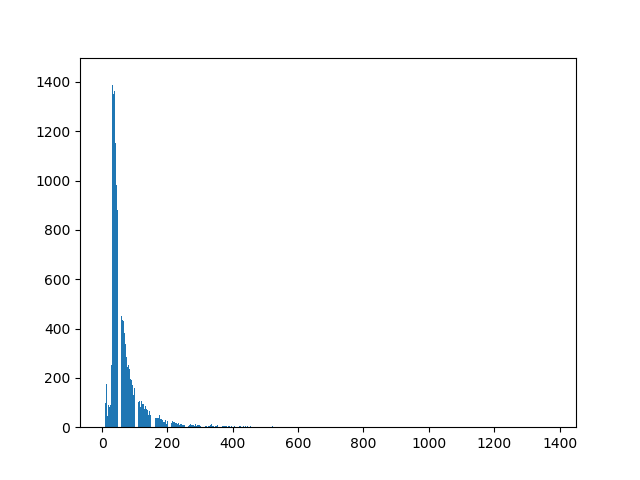

count     551.000000
mean       91.528131
std       231.140159
min         1.000000
25%         2.000000
50%         9.000000
75%        58.000000
max      1427.000000
Name: review_content, dtype: float64

In [4]:
# Longitud de los comentarios:
lenghts = df['review_content'].str.len().value_counts()
plt.bar(lenghts.index,lenghts.values)

# Datos estadísticos:
lenghts.describe()

In [4]:
comments = df_esp['review_content']

In [40]:
non_ascii = 'áàâãäÁÀÂÃÄéèêëÉÈÊẼËíìîĩïÍÌÎĨÏóòôõöÓÒÔÕÖúùûũüÚÙÛŨÜñÑçÇ'
regex = r'[a-zA-Z{}]+|[{}]+|[{}]'.format(non_ascii,string.digits,re.escape(string.punctuation))
splitted = comments.str.findall(regex)
for orig, split in zip(comments,splitted):
    print(orig)
    print(split)
    print()

Bueno el control remoto como se ofrece.
['Bueno', 'el', 'control', 'remoto', 'como', 'se', 'ofrece', '.']

Buen aparato mas su protector que le compre esta estupendo.
['Buen', 'aparato', 'mas', 'su', 'protector', 'que', 'le', 'compre', 'esta', 'estupendo', '.']

Conforme a lo establecido y tal y cual lo esperado.
['Conforme', 'a', 'lo', 'establecido', 'y', 'tal', 'y', 'cual', 'lo', 'esperado', '.']

Es exacto como la foto de referencia, tal cual. No tiene la misma calidad del material original pero se ve y funciona muy bien.
['Es', 'exacto', 'como', 'la', 'foto', 'de', 'referencia', ',', 'tal', 'cual', '.', 'No', 'tiene', 'la', 'misma', 'calidad', 'del', 'material', 'original', 'pero', 'se', 've', 'y', 'funciona', 'muy', 'bien', '.']

Muy puntual recomedable. Y buen producto.
['Muy', 'puntual', 'recomedable', '.', 'Y', 'buen', 'producto', '.']

Muy buen producto. Cumple con mis expectativas.
['Muy', 'buen', 'producto', '.', 'Cumple', 'con', 'mis', 'expectativas', '.']

Excelente produc

No estoy segura que sea alta densidad, pero el producto es buenisimo. Perfecto para la actividad fisica, es resistente y no sentis el piso. Es bien acolchonado y el material parece de calidad. El tamaño es adecuado.
['No', 'estoy', 'segura', 'que', 'sea', 'alta', 'densidad', ',', 'pero', 'el', 'producto', 'es', 'buenisimo', '.', 'Perfecto', 'para', 'la', 'actividad', 'fisica', ',', 'es', 'resistente', 'y', 'no', 'sentis', 'el', 'piso', '.', 'Es', 'bien', 'acolchonado', 'y', 'el', 'material', 'parece', 'de', 'calidad', '.', 'El', 'tamaño', 'es', 'adecuado', '.']

Excelente calidad. Supero mis expectativas.
['Excelente', 'calidad', '.', 'Supero', 'mis', 'expectativas', '.']

Es tal cual lo esperado. No tengo ninguna queja al respecto.
['Es', 'tal', 'cual', 'lo', 'esperado', '.', 'No', 'tengo', 'ninguna', 'queja', 'al', 'respecto', '.']

Muy buena calidad. Super recomendable.
['Muy', 'buena', 'calidad', '.', 'Super', 'recomendable', '.']

Muy buena! muy cómoda y fácil de limpiar.
['Muy', 

Esta bueno solo le falta unas correas para que no se corra.
['Esta', 'bueno', 'solo', 'le', 'falta', 'unas', 'correas', 'para', 'que', 'no', 'se', 'corra', '.']

Es un buen producto, bien construido.
['Es', 'un', 'buen', 'producto', ',', 'bien', 'construido', '.']

Excelente producto, es fácil el uso en personas con movilidad reducida.
['Excelente', 'producto', ',', 'es', 'fácil', 'el', 'uso', 'en', 'personas', 'con', 'movilidad', 'reducida', '.']

Excelente producto muy recomendable.
['Excelente', 'producto', 'muy', 'recomendable', '.']

Excelente producto. Recomendable al 100%.
['Excelente', 'producto', '.', 'Recomendable', 'al', '100', '%', '.']

Era para mí suegra. Muy útil, práctica, no ocupa nada de lugar. Me comentó 2 cosas:. 
1) no trae ningún instructivo ni indicación y no sabe utilizarla para brazos, pese a que dice que sirve para tren superior. 
2) es muy liviana (lo cual es bueno), pero  debe apoyarla contra una pared xq se resbala.
['Era', 'para', 'mí', 'suegra', '.', 'Muy

Muy buena calidad, tal como en la foto.
['Muy', 'buena', 'calidad', ',', 'tal', 'como', 'en', 'la', 'foto', '.']

Muy buen producto, durable y resistente.
['Muy', 'buen', 'producto', ',', 'durable', 'y', 'resistente', '.']

Me encantaron. Excelente tamaño y resistencia.
['Me', 'encantaron', '.', 'Excelente', 'tamaño', 'y', 'resistencia', '.']

Excelente producto acorde a lo que necesitaba.
['Excelente', 'producto', 'acorde', 'a', 'lo', 'que', 'necesitaba', '.']

Excelente producto, util para envolturas destinada a proteger los elementos a cubrir.
['Excelente', 'producto', ',', 'util', 'para', 'envolturas', 'destinada', 'a', 'proteger', 'los', 'elementos', 'a', 'cubrir', '.']

Súper, excelente calidad. Me encantaron. Súper recomendadas.
['Súper', ',', 'excelente', 'calidad', '.', 'Me', 'encantaron', '.', 'Súper', 'recomendadas', '.']

Se ajusta a mis necesidades que son para envolver prendas deportivas. 
. 
La solapa pega bien. 
. 
El celofan es silecioso.
['Se', 'ajusta', 'a', 'mis', '


Hace 2 semanas lo tengo funcionando 24 horas alimentando un ventilador de 12 voltios y 1 amperio, no se ha dañado pero permanece bastante caliente.
['Hace', '2', 'semanas', 'lo', 'tengo', 'funcionando', '24', 'horas', 'alimentando', 'un', 'ventilador', 'de', '12', 'voltios', 'y', '1', 'amperio', ',', 'no', 'se', 'ha', 'dañado', 'pero', 'permanece', 'bastante', 'caliente', '.']

Buen producto, funciona y ofrece lo prometido.
['Buen', 'producto', ',', 'funciona', 'y', 'ofrece', 'lo', 'prometido', '.']

Excelente producto, ha servido mejor de lo que pensé, no se recalienta y puede trabajar bien durante muchas horas.
['Excelente', 'producto', ',', 'ha', 'servido', 'mejor', 'de', 'lo', 'que', 'pensé', ',', 'no', 'se', 'recalienta', 'y', 'puede', 'trabajar', 'bien', 'durante', 'muchas', 'horas', '.']

Muy bue producto, cubrió con mis espevtativas y necesidades.
['Muy', 'bue', 'producto', ',', 'cubrió', 'con', 'mis', 'espevtativas', 'y', 'necesidades', '.']

La calidad de los cables es buena


Es genial muy recomendable, robostu y muy práctico.
['Es', 'genial', 'muy', 'recomendable', ',', 'robostu', 'y', 'muy', 'práctico', '.']

Espetacular era  lo  que  yo  necesitaba.
['Espetacular', 'era', 'lo', 'que', 'yo', 'necesitaba', '.']

Muy solida, muy recomendable. 
Atura perfecta para alguien de 1,80m de altura. 
Ideal que sea plegable.
['Muy', 'solida', ',', 'muy', 'recomendable', '.', 'Atura', 'perfecta', 'para', 'alguien', 'de', '1', ',', '80', 'm', 'de', 'altura', '.', 'Ideal', 'que', 'sea', 'plegable', '.']

Excelente calidad,le cargue 100 kilos y anduvo joya,super práctico como se achica para q entre en el auto,se lo ve muy resistente y bien soldado.
['Excelente', 'calidad', ',', 'le', 'cargue', '100', 'kilos', 'y', 'anduvo', 'joya', ',', 'super', 'práctico', 'como', 'se', 'achica', 'para', 'q', 'entre', 'en', 'el', 'auto', ',', 'se', 'lo', 've', 'muy', 'resistente', 'y', 'bien', 'soldado', '.']

Super practica para cargar y transportar.
['Super', 'practica', 'para', 'car

Muy bueno  es lo esperado funciona a la perfeccion.
['Muy', 'bueno', 'es', 'lo', 'esperado', 'funciona', 'a', 'la', 'perfeccion', '.']

Está bueno. Es lo que esperaba. Anda de diez.
['Está', 'bueno', '.', 'Es', 'lo', 'que', 'esperaba', '.', 'Anda', 'de', 'diez', '.']

Excelente, es mas de lo que esperaba, gran herramienta.
['Excelente', ',', 'es', 'mas', 'de', 'lo', 'que', 'esperaba', ',', 'gran', 'herramienta', '.']

Lo usé poco, pero es excelente. La velocidad q podés regular y la reversa para destornillar, muy cómodo y práctico.
['Lo', 'usé', 'poco', ',', 'pero', 'es', 'excelente', '.', 'La', 'velocidad', 'q', 'podés', 'regular', 'y', 'la', 'reversa', 'para', 'destornillar', ',', 'muy', 'cómodo', 'y', 'práctico', '.']

Cumple con las expectativas basicas. El taladro es lo que se paga, ni mas ni menos. No tiene fallas graves, pero por ej las mechas no sirven. Me arrepiento de no haber comprado un taladro aparte, y mechas también de una buena marca (makita por ej). El maletin cumple s

Muy buena calidad muy amplia sus formas para trabajar potente y simpli y con accesorios muy útiles.
['Muy', 'buena', 'calidad', 'muy', 'amplia', 'sus', 'formas', 'para', 'trabajar', 'potente', 'y', 'simpli', 'y', 'con', 'accesorios', 'muy', 'útiles', '.']

Todavía no la use profesional mente pero se ve bien robusta bastante pesada funciona muy bien toda sus funciones se ve muy buena.
['Todavía', 'no', 'la', 'use', 'profesional', 'mente', 'pero', 'se', 've', 'bien', 'robusta', 'bastante', 'pesada', 'funciona', 'muy', 'bien', 'toda', 'sus', 'funciones', 'se', 've', 'muy', 'buena', '.']

Muy buen producto. Lo he usado para hacer perforaciones en bloques de 15cm de ancho de madera medio a dura y no presentonninguna dificultad. No le doy 5 porque solo la use un día. Muy recomendable. Sobre todo para trabajos hobbistas u hogareños. Buen torque y rpm.
['Muy', 'buen', 'producto', '.', 'Lo', 'he', 'usado', 'para', 'hacer', 'perforaciones', 'en', 'bloques', 'de', '15', 'cm', 'de', 'ancho', 'de',

Me resultó muy útil , era lo que esperaba. Gracias.
['Me', 'resultó', 'muy', 'útil', ',', 'era', 'lo', 'que', 'esperaba', '.', 'Gracias', '.']

Muy bueno. Me sirvio para lo q esperaba.
['Muy', 'bueno', '.', 'Me', 'sirvio', 'para', 'lo', 'q', 'esperaba', '.']

Muy buen producto, anda muy bien para el uso de hobby para la cual la compre. 
Recomiendo.
['Muy', 'buen', 'producto', ',', 'anda', 'muy', 'bien', 'para', 'el', 'uso', 'de', 'hobby', 'para', 'la', 'cual', 'la', 'compre', '.', 'Recomiendo', '.']

¡ exelente herramienta !. Fácil de usar , precisa y rápida para hacer trabajos con madera. Muy satisfecho con la compra.
['exelente', 'herramienta', '!', '.', 'Fácil', 'de', 'usar', ',', 'precisa', 'y', 'rápida', 'para', 'hacer', 'trabajos', 'con', 'madera', '.', 'Muy', 'satisfecho', 'con', 'la', 'compra', '.']

Muy buen producto es lo que yo queria.
['Muy', 'buen', 'producto', 'es', 'lo', 'que', 'yo', 'queria', '.']

Muy buen producto, excelente precio y calidad !.
['Muy', 'buen', 'produc


Tomo muy bien.
['Tomo', 'muy', 'bien', '.']

Excelente producto. Cumpe su funcion y quita la proteccion dhcp.
['Excelente', 'producto', '.', 'Cumpe', 'su', 'funcion', 'y', 'quita', 'la', 'proteccion', 'dhcp', '.']

Muy buen producto.
['Muy', 'buen', 'producto', '.']

No me funciona ,.
['No', 'me', 'funciona', ',', '.']

El producto es perfecto y anda genial.
['El', 'producto', 'es', 'perfecto', 'y', 'anda', 'genial', '.']

Pequeño, alimentacion por usb, cumple perfectamente con lo que se pide, barato. Recomendadisimo.
['Pequeño', ',', 'alimentacion', 'por', 'usb', ',', 'cumple', 'perfectamente', 'con', 'lo', 'que', 'se', 'pide', ',', 'barato', '.', 'Recomendadisimo', '.']

Solo un mes lo pude usar y dejo de funsuonar uba salida. Muy malo.
['Solo', 'un', 'mes', 'lo', 'pude', 'usar', 'y', 'dejo', 'de', 'funsuonar', 'uba', 'salida', '.', 'Muy', 'malo', '.']

Todo bien, perdon por la demora en opinar sobre el producto, gracias.
['Todo', 'bien', ',', 'perdon', 'por', 'la', 'demora', 'en', 

['Todo', 'ok', '!', 'muy', 'buen', 'producto', '.', 'Recomendable', '.']

No tiene buen sonido, no tiene nada de graves. Por ser jbl esperaba más.
['No', 'tiene', 'buen', 'sonido', ',', 'no', 'tiene', 'nada', 'de', 'graves', '.', 'Por', 'ser', 'jbl', 'esperaba', 'más', '.']

Sonido bien acorde al precio, pero los materiales son delicados, los cables los veo muy frágiles, al igual que la ficha que tiene forma curva y en el bolsillo x ejemplo se dobla bastante.
['Sonido', 'bien', 'acorde', 'al', 'precio', ',', 'pero', 'los', 'materiales', 'son', 'delicados', ',', 'los', 'cables', 'los', 'veo', 'muy', 'frágiles', ',', 'al', 'igual', 'que', 'la', 'ficha', 'que', 'tiene', 'forma', 'curva', 'y', 'en', 'el', 'bolsillo', 'x', 'ejemplo', 'se', 'dobla', 'bastante', '.']

Excelente, recomendable sin dudas.
['Excelente', ',', 'recomendable', 'sin', 'dudas', '.']

Muy buenos,se escucha muy bien.
['Muy', 'buenos', ',', 'se', 'escucha', 'muy', 'bien', '.']

Buena relación precio calidad. Conforme.
['

['Simplemente', 'lo', 'que', 'esperaba', '!', '!', '!', '.', '=', 'd', '.']

Hermosos, y cualquier auris kz tienen excelentísima calidad de sonido.
['Hermosos', ',', 'y', 'cualquier', 'auris', 'kz', 'tienen', 'excelentísima', 'calidad', 'de', 'sonido', '.']

Excelentes, se escucha de maravilla y el cable es muy seguro :).
['Excelentes', ',', 'se', 'escucha', 'de', 'maravilla', 'y', 'el', 'cable', 'es', 'muy', 'seguro', ':', ')', '.']

Muy buen producto. Lo recomiendo.
['Muy', 'buen', 'producto', '.', 'Lo', 'recomiendo', '.']

Muy buenos auriculares, pero no tan bueno para musica/uso cotidiano.
['Muy', 'buenos', 'auriculares', ',', 'pero', 'no', 'tan', 'bueno', 'para', 'musica', '/', 'uso', 'cotidiano', '.']

Son muy brillantes,los bajos son normales pero los agudos son insoportables.
['Son', 'muy', 'brillantes', ',', 'los', 'bajos', 'son', 'normales', 'pero', 'los', 'agudos', 'son', 'insoportables', '.']

Excelente calidad y fidelidad, cumple con lo esperado.
['Excelente', 'calidad', '

100 x 100 recomendable  funciona muy bien.
['100', 'x', '100', 'recomendable', 'funciona', 'muy', 'bien', '.']

Muy bueno el producto.
['Muy', 'bueno', 'el', 'producto', '.']

Muy buen producto.
['Muy', 'buen', 'producto', '.']

Buen kit, es muy efectivo.
['Buen', 'kit', ',', 'es', 'muy', 'efectivo', '.']

Muy bueno y práctico. Fácil de conexión.
['Muy', 'bueno', 'y', 'práctico', '.', 'Fácil', 'de', 'conexión', '.']

Está bien. Práctico y medio complicado de instalar pero bueno jajaja ya veré como lo soluciono.
['Está', 'bien', '.', 'Práctico', 'y', 'medio', 'complicado', 'de', 'instalar', 'pero', 'bueno', 'jajaja', 'ya', 'veré', 'como', 'lo', 'soluciono', '.']

Todo perfecto. Funciona bien.
['Todo', 'perfecto', '.', 'Funciona', 'bien', '.']

Buen producto. Tal cual lo esperado. Recomendable!!!.
['Buen', 'producto', '.', 'Tal', 'cual', 'lo', 'esperado', '.', 'Recomendable', '!', '!', '!', '.']

Muy bueno la verdad. Un poco complicado para encontrar la señal, pero en realidad las explic

['Por', 'ahora', 'funcionan', 'bien', 'los', 'use', 'una', 'ves', 'solo', 'espero', 'que', 'me', 'duren', '.']

Muy muy buena, es mas de lo que esperaba, solo una critica: le hace falta una luz indicadora de carga, por lo de mas excelente.
['Muy', 'muy', 'buena', ',', 'es', 'mas', 'de', 'lo', 'que', 'esperaba', ',', 'solo', 'una', 'critica', ':', 'le', 'hace', 'falta', 'una', 'luz', 'indicadora', 'de', 'carga', ',', 'por', 'lo', 'de', 'mas', 'excelente', '.']

Estoy muy conforme, las luces alumbran mas de lo que esperaba y tiene un regulador como las linternas de antes que amplia el halo luminoso aun mas. Recomiendo.
['Estoy', 'muy', 'conforme', ',', 'las', 'luces', 'alumbran', 'mas', 'de', 'lo', 'que', 'esperaba', 'y', 'tiene', 'un', 'regulador', 'como', 'las', 'linternas', 'de', 'antes', 'que', 'amplia', 'el', 'halo', 'luminoso', 'aun', 'mas', '.', 'Recomiendo', '.']

Excelente producto!! muy  recomendable!.
['Excelente', 'producto', '!', '!', 'muy', 'recomendable', '!', '.']

Muy bu


La verdad muy conforme con el producto 100 % recomendable.
['La', 'verdad', 'muy', 'conforme', 'con', 'el', 'producto', '100', '%', 'recomendable', '.']

Exelente reel de la gama baja de shimano muy bueno.
['Exelente', 'reel', 'de', 'la', 'gama', 'baja', 'de', 'shimano', 'muy', 'bueno', '.']

Ermoso de 10 muy bueno ya saqué un surubi de 8 quilo y se re banco.
['Ermoso', 'de', '10', 'muy', 'bueno', 'ya', 'saqué', 'un', 'surubi', 'de', '8', 'quilo', 'y', 'se', 're', 'banco', '.']

Muy buen producto y calidad es lo que esperaba.
['Muy', 'buen', 'producto', 'y', 'calidad', 'es', 'lo', 'que', 'esperaba', '.']

Es un reel liviano y dinámico, de tamaño ideal para la pesca de piezas pequeñas,. Cumplió con mis expectativas.
['Es', 'un', 'reel', 'liviano', 'y', 'dinámico', ',', 'de', 'tamaño', 'ideal', 'para', 'la', 'pesca', 'de', 'piezas', 'pequeñas', ',', '.', 'Cumplió', 'con', 'mis', 'expectativas', '.']

Aceptable por el precio. Le faltaria un ruleman mas en el otro extremo del eje de la co

['La', 'verdad', 'que', 'mejor', 'de', 'lo', 'que', 'pensaba', 'por', 'el', 'precio', 'pensé', 'que', 'no', 'fuera', 'tan', 'linda', 'la', 'calidad', '.']

Buen producto muy buena calidad me quedo perfecto muy recomendable. 
Volvería. A. Comprar.
['Buen', 'producto', 'muy', 'buena', 'calidad', 'me', 'quedo', 'perfecto', 'muy', 'recomendable', '.', 'Volvería', '.', 'A', '.', 'Comprar', '.']

Quedo como pintado. Bien de bien.
['Quedo', 'como', 'pintado', '.', 'Bien', 'de', 'bien', '.']

Muy buen producto confeccionado con material que conserva el color y la forma después del lavado.
['Muy', 'buen', 'producto', 'confeccionado', 'con', 'material', 'que', 'conserva', 'el', 'color', 'y', 'la', 'forma', 'después', 'del', 'lavado', '.']

Impecable, muy buena relacion calidad-precio. Recomiendo.
['Impecable', ',', 'muy', 'buena', 'relacion', 'calidad', '-', 'precio', '.', 'Recomiendo', '.']

Todo correcto y en forma. 
Gracias.
['Todo', 'correcto', 'y', 'en', 'forma', '.', 'Gracias', '.']

Me gu

['Queda', 'ajustada', 'al', 'cuerpo', '.', 'Pero', 'material', 'muy', 'bueno', '.']

Excelente, muy buen producto. Buena calidad y terminación.
['Excelente', ',', 'muy', 'buen', 'producto', '.', 'Buena', 'calidad', 'y', 'terminación', '.']

Muy buena calidad lo que esperaba.
['Muy', 'buena', 'calidad', 'lo', 'que', 'esperaba', '.']

Muy bien todo.
['Muy', 'bien', 'todo', '.']

Muy buena calidad, me queda perfecto.
['Muy', 'buena', 'calidad', ',', 'me', 'queda', 'perfecto', '.']

Exelente calidad, gente de confianza y me atendieron muy amablemente, recomendable!!.
['Exelente', 'calidad', ',', 'gente', 'de', 'confianza', 'y', 'me', 'atendieron', 'muy', 'amablemente', ',', 'recomendable', '!', '!', '.']

Excelente producto. Muy recomendable.
['Excelente', 'producto', '.', 'Muy', 'recomendable', '.']

Excelente producto, de muy buena calidad.
['Excelente', 'producto', ',', 'de', 'muy', 'buena', 'calidad', '.']

Exelente se recomienda el producto.
['Exelente', 'se', 'recomienda', 'el', 'pro

['Muy', 'bueno', ',', 'super', 'lindo', ',', 'y', 'muy', 'buena', 'calidad', '.']

Perfecto! era para mi sobrina, quedó realmente encantada.
['Perfecto', '!', 'era', 'para', 'mi', 'sobrina', ',', 'quedó', 'realmente', 'encantada', '.']

Muy lindo y de acuerdo a lo que encargue. !!!.
['Muy', 'lindo', 'y', 'de', 'acuerdo', 'a', 'lo', 'que', 'encargue', '.', '!', '!', '!', '.']

Muy buena calidad, suave y bien calce.
['Muy', 'buena', 'calidad', ',', 'suave', 'y', 'bien', 'calce', '.']

Precioso pijama. La calidad es muy linda.
['Precioso', 'pijama', '.', 'La', 'calidad', 'es', 'muy', 'linda', '.']

. Muy lindo la agasajada quedé súper contenta y feliz con su regalo.
['.', 'Muy', 'lindo', 'la', 'agasajada', 'quedé', 'súper', 'contenta', 'y', 'feliz', 'con', 'su', 'regalo', '.']

Precioso, muy abrigadito, la niña feliz con su pijama. Súper recomendable!!!.
['Precioso', ',', 'muy', 'abrigadito', ',', 'la', 'niña', 'feliz', 'con', 'su', 'pijama', '.', 'Súper', 'recomendable', '!', '!', '!', '

Muy linda calidad le quedo perfecto.
['Muy', 'linda', 'calidad', 'le', 'quedo', 'perfecto', '.']

Exelente muy cómodos los recomiendo.
['Exelente', 'muy', 'cómodos', 'los', 'recomiendo', '.']

Esta bien el talle! nos pareció que es un poco corto de largo.
['Esta', 'bien', 'el', 'talle', '!', 'nos', 'pareció', 'que', 'es', 'un', 'poco', 'corto', 'de', 'largo', '.']

Perfecto pero me quedo grande. Lo mande achicar a la modista.
['Perfecto', 'pero', 'me', 'quedo', 'grande', '.', 'Lo', 'mande', 'achicar', 'a', 'la', 'modista', '.']

Lo que esperaba. Muy buena calidad.
['Lo', 'que', 'esperaba', '.', 'Muy', 'buena', 'calidad', '.']

Excelente relación costo beneficio.
['Excelente', 'relación', 'costo', 'beneficio', '.']

Muy buena calidad, muchas gracias.
['Muy', 'buena', 'calidad', ',', 'muchas', 'gracias', '.']

Es un producto correcto por un muy buen precio.
['Es', 'un', 'producto', 'correcto', 'por', 'un', 'muy', 'buen', 'precio', '.']

Lo veia como un pantalon de vestir pero es mas bien

['Funciona', 'muy', 'bien', ',', 'como', 'la', 'original', '.']

Buena calidad de imagen funciona muy bien muy parecido al original.
['Buena', 'calidad', 'de', 'imagen', 'funciona', 'muy', 'bien', 'muy', 'parecido', 'al', 'original', '.']

Lo pude instalar yo mismo con un tutorial y funcionó. Me gusta como se ve la pantalla y el touch funciona perfecto.
['Lo', 'pude', 'instalar', 'yo', 'mismo', 'con', 'un', 'tutorial', 'y', 'funcionó', '.', 'Me', 'gusta', 'como', 'se', 've', 'la', 'pantalla', 'y', 'el', 'touch', 'funciona', 'perfecto', '.']

No es de tan buena calidad ya que las patitas para atornillar al case no concuerda.
['No', 'es', 'de', 'tan', 'buena', 'calidad', 'ya', 'que', 'las', 'patitas', 'para', 'atornillar', 'al', 'case', 'no', 'concuerda', '.']

Excelente muy buen producto recomendable.
['Excelente', 'muy', 'buen', 'producto', 'recomendable', '.']

Muy buen artículo, es conveniente.
['Muy', 'buen', 'artículo', ',', 'es', 'conveniente', '.']

Excelente producto, lo recomie

Buen producto, lo recomiendo, funciona para muy bien para trabajar con pantallas.
['Buen', 'producto', ',', 'lo', 'recomiendo', ',', 'funciona', 'para', 'muy', 'bien', 'para', 'trabajar', 'con', 'pantallas', '.']

Todo bien con el producto, el pegamento funciona.
['Todo', 'bien', 'con', 'el', 'producto', ',', 'el', 'pegamento', 'funciona', '.']

Perfecto, producto excelente. Muchas gracias.
['Perfecto', ',', 'producto', 'excelente', '.', 'Muchas', 'gracias', '.']

Excelente producto, es lo que necesitaba.
['Excelente', 'producto', ',', 'es', 'lo', 'que', 'necesitaba', '.']

Buen producto, quedo bien pegada la pantalla. Ademas tiene una boquilla metálica que facilita la aplicación del pegamento.
['Buen', 'producto', ',', 'quedo', 'bien', 'pegada', 'la', 'pantalla', '.', 'Ademas', 'tiene', 'una', 'boquilla', 'metálica', 'que', 'facilita', 'la', 'aplicación', 'del', 'pegamento', '.']

Pega bien, lo usé para pantalla de mi celular y quedó oka.
['Pega', 'bien', ',', 'lo', 'usé', 'para', 'pa

['Pesimo', 'producto', 'lo', 'desenrolle', 'y', 'se', 'rompio', 'ni', 'lo', 'pude', 'usar', '.']

Cumple su objetivo,funcionalidad.
['Cumple', 'su', 'objetivo', ',', 'funcionalidad', '.']

Es muy bueno, porque cumple su función.
['Es', 'muy', 'bueno', ',', 'porque', 'cumple', 'su', 'función', '.']

Malo. No soporta peso de celular. No sirve para nada.
['Malo', '.', 'No', 'soporta', 'peso', 'de', 'celular', '.', 'No', 'sirve', 'para', 'nada', '.']

Ni siquiera lo alcancé a usar, se quebró al manipularlo.
['Ni', 'siquiera', 'lo', 'alcancé', 'a', 'usar', ',', 'se', 'quebró', 'al', 'manipularlo', '.']

Me parece un buen producto y de buena calidad.
['Me', 'parece', 'un', 'buen', 'producto', 'y', 'de', 'buena', 'calidad', '.']

Producto barato y bueno cumple con su objetivo.
['Producto', 'barato', 'y', 'bueno', 'cumple', 'con', 'su', 'objetivo', '.']

Es un buen producto para el precio. La base es plástica hay que usarla con cuidado. El resorte metálico es súper apretado y soporta bien. Pen

Cumple con las expectativas, pero no tiene el logo de la marca.
['Cumple', 'con', 'las', 'expectativas', ',', 'pero', 'no', 'tiene', 'el', 'logo', 'de', 'la', 'marca', '.']

Bueno, ojo para los que necesitan mas altura y estabilidad. Yo quede corto.
['Bueno', ',', 'ojo', 'para', 'los', 'que', 'necesitan', 'mas', 'altura', 'y', 'estabilidad', '.', 'Yo', 'quede', 'corto', '.']

Cumple con su propósito y el material está bastante bueno, muchas gracias.
['Cumple', 'con', 'su', 'propósito', 'y', 'el', 'material', 'está', 'bastante', 'bueno', ',', 'muchas', 'gracias', '.']

Todo bien! es lo que esperaba.
['Todo', 'bien', '!', 'es', 'lo', 'que', 'esperaba', '.']

El producto es de buena calidad, aunque los típodes algo endebles. Sin embargo cumplen 100% con su propósito si uno los manipula con el suficiente cuidado. La relación precio calidad es óptima.
['El', 'producto', 'es', 'de', 'buena', 'calidad', ',', 'aunque', 'los', 'típodes', 'algo', 'endebles', '.', 'Sin', 'embargo', 'cumplen', '10

Exelente producto lo recomiendo.
['Exelente', 'producto', 'lo', 'recomiendo', '.']

Recomendado.
['Recomendado', '.']

Es exactamente lo que necesitaba.
['Es', 'exactamente', 'lo', 'que', 'necesitaba', '.']

Excelente producto, lo recomiendo.
['Excelente', 'producto', ',', 'lo', 'recomiendo', '.']

Muy buen producto para obra institucional.
['Muy', 'buen', 'producto', 'para', 'obra', 'institucional', '.']

Material de baja calidad a un precio muy alto.
['Material', 'de', 'baja', 'calidad', 'a', 'un', 'precio', 'muy', 'alto', '.']

Me gustó mucho muy buen producto.
['Me', 'gustó', 'mucho', 'muy', 'buen', 'producto', '.']

Muy buen producto en calidad y precio.
['Muy', 'buen', 'producto', 'en', 'calidad', 'y', 'precio', '.']

Muy buen servivio y producto, altamente recomendable.
['Muy', 'buen', 'servivio', 'y', 'producto', ',', 'altamente', 'recomendable', '.']

Excelente producto, de muy buena calidad. Gracias.
['Excelente', 'producto', ',', 'de', 'muy', 'buena', 'calidad', '.', 'Gracia

['Muy', 'cómodas', 'y', 'buena', 'calidad', 'me', 'encantaron', '.']

Exelente producto. Lo recomiendo.
['Exelente', 'producto', '.', 'Lo', 'recomiendo', '.']

Excelente producto, cómodos y la talla correcta.
['Excelente', 'producto', ',', 'cómodos', 'y', 'la', 'talla', 'correcta', '.']

Excelentes!! mis hijas felices con sus crocs.
['Excelentes', '!', '!', 'mis', 'hijas', 'felices', 'con', 'sus', 'crocs', '.']

Un poco pequeñas pero muy bonitas.
['Un', 'poco', 'pequeñas', 'pero', 'muy', 'bonitas', '.']

Excelente calidad y buen material.
['Excelente', 'calidad', 'y', 'buen', 'material', '.']

Muy bueno y cómodo, buena calidad.
['Muy', 'bueno', 'y', 'cómodo', ',', 'buena', 'calidad', '.']

Exelente producto lo recomiendo.
['Exelente', 'producto', 'lo', 'recomiendo', '.']

Muy buen producto, todo muy bien.
['Muy', 'buen', 'producto', ',', 'todo', 'muy', 'bien', '.']

Justo como lo dice la descripción, excelente.
['Justo', 'como', 'lo', 'dice', 'la', 'descripción', ',', 'excelente', '.']

['Bellisimos', ',', 'me', 'encantaron', '!', '!', '!', '!', '.']

Están súper cómodos y el material viene muy bueno aunque la talla viene mas grande.
['Están', 'súper', 'cómodos', 'y', 'el', 'material', 'viene', 'muy', 'bueno', 'aunque', 'la', 'talla', 'viene', 'mas', 'grande', '.']

Están hermosos, tenía dudas en cuanto a la comodidad del producto y la vdd que me. Sorprendieron. Están muy cómodos para el día a día. Sin duda alguna me encantaron. Valió la pena mi compra. :d.
['Están', 'hermosos', ',', 'tenía', 'dudas', 'en', 'cuanto', 'a', 'la', 'comodidad', 'del', 'producto', 'y', 'la', 'vdd', 'que', 'me', '.', 'Sorprendieron', '.', 'Están', 'muy', 'cómodos', 'para', 'el', 'día', 'a', 'día', '.', 'Sin', 'duda', 'alguna', 'me', 'encantaron', '.', 'Valió', 'la', 'pena', 'mi', 'compra', '.', ':', 'd', '.']

Muy bonitos, suavecitos, los colores muy padres!!.
['Muy', 'bonitos', ',', 'suavecitos', ',', 'los', 'colores', 'muy', 'padres', '!', '!', '.']

Me gustaron muy bonitos, buena calidad


No me gustó, es plástico por dentro y fuera.
['No', 'me', 'gustó', ',', 'es', 'plástico', 'por', 'dentro', 'y', 'fuera', '.']

Esperaba algo diferente, esperaba mejores materiales, pero no me afecta tanto pues no era para mi.
['Esperaba', 'algo', 'diferente', ',', 'esperaba', 'mejores', 'materiales', ',', 'pero', 'no', 'me', 'afecta', 'tanto', 'pues', 'no', 'era', 'para', 'mi', '.']

El producto luce como en la imagen, tiene un tamaño adecuado y es de material termico, ideal para niños o incluso adultos.
['El', 'producto', 'luce', 'como', 'en', 'la', 'imagen', ',', 'tiene', 'un', 'tamaño', 'adecuado', 'y', 'es', 'de', 'material', 'termico', ',', 'ideal', 'para', 'niños', 'o', 'incluso', 'adultos', '.']

Es un poco pequeña, pero me gustó mucho.
['Es', 'un', 'poco', 'pequeña', ',', 'pero', 'me', 'gustó', 'mucho', '.']

Llevo un par de días usándola y sus costuras vienen muy débiles, se descocio de las dos agarraderas.
['Llevo', 'un', 'par', 'de', 'días', 'usándola', 'y', 'sus', 'costura

['La', 'lonchera', 'es', 'muy', 'amplia', 'y', 'bonita', '.', 'Cumple', 'su', 'función', '.']

Muy buena calidad. Justo lo que anuncian.
['Muy', 'buena', 'calidad', '.', 'Justo', 'lo', 'que', 'anuncian', '.']

Excelente producto si compraria mas.
['Excelente', 'producto', 'si', 'compraria', 'mas', '.']

Esta muy bonita y esta perfecto el tamaño para lo que necesito.
['Esta', 'muy', 'bonita', 'y', 'esta', 'perfecto', 'el', 'tamaño', 'para', 'lo', 'que', 'necesito', '.']

Prácticamente la compré para mi novia y le pareció excelente el tamaño y el diseño le encantó.
['Prácticamente', 'la', 'compré', 'para', 'mi', 'novia', 'y', 'le', 'pareció', 'excelente', 'el', 'tamaño', 'y', 'el', 'diseño', 'le', 'encantó', '.']

Es más grande de lo que imaginé muy amplia.
['Es', 'más', 'grande', 'de', 'lo', 'que', 'imaginé', 'muy', 'amplia', '.']

Excelente producto para el precio, me ha servido bastante.
['Excelente', 'producto', 'para', 'el', 'precio', ',', 'me', 'ha', 'servido', 'bastante', '.']

Ad


De muy buena calidad. Recomendados.
['De', 'muy', 'buena', 'calidad', '.', 'Recomendados', '.']

Muy hermosos gracias los volveria encargar.
['Muy', 'hermosos', 'gracias', 'los', 'volveria', 'encargar', '.']

Tal cual esta en la imagen, buen material, bellos.
['Tal', 'cual', 'esta', 'en', 'la', 'imagen', ',', 'buen', 'material', ',', 'bellos', '.']

Producto con las 3b bueno bonito y barato, ajustable a la mano.
['Producto', 'con', 'las', '3', 'b', 'bueno', 'bonito', 'y', 'barato', ',', 'ajustable', 'a', 'la', 'mano', '.']

Bonitos, pero dicen que son de cuero y en realidad son de vinipiel.
['Bonitos', ',', 'pero', 'dicen', 'que', 'son', 'de', 'cuero', 'y', 'en', 'realidad', 'son', 'de', 'vinipiel', '.']

Buen producto a muy bien precio, diseño está genial.
['Buen', 'producto', 'a', 'muy', 'bien', 'precio', ',', 'diseño', 'está', 'genial', '.']

Mu buen producto  recomendado gracias.
['Mu', 'buen', 'producto', 'recomendado', 'gracias', '.']

Excelente material muy cómodos y elegantes.

Excelente producto, para el precio.
['Excelente', 'producto', ',', 'para', 'el', 'precio', '.']

Excelente producto, y muy comodo.
['Excelente', 'producto', ',', 'y', 'muy', 'comodo', '.']

Excelente no se arrepentiran lo volvería a comprar.
['Excelente', 'no', 'se', 'arrepentiran', 'lo', 'volvería', 'a', 'comprar', '.']

Excelente ya lo estoy recomendando a mis amigos.
['Excelente', 'ya', 'lo', 'estoy', 'recomendando', 'a', 'mis', 'amigos', '.']

Elegantes para tu aufit  formal, excelente calidad, satisfecho al 100%.
['Elegantes', 'para', 'tu', 'aufit', 'formal', ',', 'excelente', 'calidad', ',', 'satisfecho', 'al', '100', '%', '.']

Muy comodos, elegantes y buenos para cualquier evento.
['Muy', 'comodos', ',', 'elegantes', 'y', 'buenos', 'para', 'cualquier', 'evento', '.']

No creo que duren mucho pero son bonitos y comodos. Por el precio esta mejor que las basuras de christian galery.
['No', 'creo', 'que', 'duren', 'mucho', 'pero', 'son', 'bonitos', 'y', 'comodos', '.', 'Por', 'el',

Excelente producto y con buena calidad.
['Excelente', 'producto', 'y', 'con', 'buena', 'calidad', '.']

Muy comodo para trabajar largos turnos.
['Muy', 'comodo', 'para', 'trabajar', 'largos', 'turnos', '.']

Simplemente, excelente producto.
['Simplemente', ',', 'excelente', 'producto', '.']

Fantástico. Muy suaves y cómodos para el trabajo diario además de que se amoldan y la piel es muy suave no se endurece para la siguiente puesta y eso facilita a qué el pie ya de por sí descanse ya que es pesado y molestó estar la mayor parte de 8 horas de pie y con esto de la contingencia de covid 19 lamentablemente más pesado es nuestro trabajo. Una opinión muy personal pero sería maravilloso recibir está en maravilla de confort todo el personal de mi hospital somos del municipio de matehuala,san luis potosí del hospital general de matehuala.
['Fantástico', '.', 'Muy', 'suaves', 'y', 'cómodos', 'para', 'el', 'trabajo', 'diario', 'además', 'de', 'que', 'se', 'amoldan', 'y', 'la', 'piel', 'es', 'muy

['Mejoro', 'bastante', 'con', 'respecto', 'a', 'las', 'comunes', '.']

Muy buenas en comparación de las tradicionales.
['Muy', 'buenas', 'en', 'comparación', 'de', 'las', 'tradicionales', '.']

100% recomendable,los materiales son buenos,entro en su posición sin problemas,por el precio es un buen producto!.
['100', '%', 'recomendable', ',', 'los', 'materiales', 'son', 'buenos', ',', 'entro', 'en', 'su', 'posición', 'sin', 'problemas', ',', 'por', 'el', 'precio', 'es', 'un', 'buen', 'producto', '!', '.']

El producto es el que buscaba y a buen precio.
['El', 'producto', 'es', 'el', 'que', 'buscaba', 'y', 'a', 'buen', 'precio', '.']

Bueno, tomando en cuenta precio  producto.
['Bueno', ',', 'tomando', 'en', 'cuenta', 'precio', 'producto', '.']

Excelente producto. No tuve problemas al instalarlo.
['Excelente', 'producto', '.', 'No', 'tuve', 'problemas', 'al', 'instalarlo', '.']

Todo bien es lo que pedi. Buen producto.
['Todo', 'bien', 'es', 'lo', 'que', 'pedi', '.', 'Buen', 'producto', 

['Excelente', 'cumplio', 'de', '10', 'con', 'lo', 'prometido', ',', 'muy', 'recomendable', '.']

Excelente precio y calidad.
['Excelente', 'precio', 'y', 'calidad', '.']

Exelente.
['Exelente', '.']

Todo bien , rapido y en muy buenas condiciones.
['Todo', 'bien', ',', 'rapido', 'y', 'en', 'muy', 'buenas', 'condiciones', '.']

Excelente todo.
['Excelente', 'todo', '.']

Excelente producto. Igual al original. Calza perfecto en la carrocería, tiene buen color y no se nota la diferencia con el otro original ya colocado. Muy recomendable.
['Excelente', 'producto', '.', 'Igual', 'al', 'original', '.', 'Calza', 'perfecto', 'en', 'la', 'carrocería', ',', 'tiene', 'buen', 'color', 'y', 'no', 'se', 'nota', 'la', 'diferencia', 'con', 'el', 'otro', 'original', 'ya', 'colocado', '.', 'Muy', 'recomendable', '.']

De diez.
['De', 'diez', '.']

Era lo que esperaba. ,,.
['Era', 'lo', 'que', 'esperaba', '.', ',', ',', '.']

Muy buen producto justo lo que pedi.
['Muy', 'buen', 'producto', 'justo', 'lo',

Todo perfecto con el faro calzo de 10. Sin problemas.
['Todo', 'perfecto', 'con', 'el', 'faro', 'calzo', 'de', '10', '.', 'Sin', 'problemas', '.']

Muy buen producto. Buena calidad y excelente precio.
['Muy', 'buen', 'producto', '.', 'Buena', 'calidad', 'y', 'excelente', 'precio', '.']

Calza perfecto, muy buen color, no existen diferencias al original. 100% recomendable.
['Calza', 'perfecto', ',', 'muy', 'buen', 'color', ',', 'no', 'existen', 'diferencias', 'al', 'original', '.', '100', '%', 'recomendable', '.']

Producto excelente super recomendable.
['Producto', 'excelente', 'super', 'recomendable', '.']

Excelente el faro. Un abrazo. Recomendable 100x100. Compre sin miedo amigos.
['Excelente', 'el', 'faro', '.', 'Un', 'abrazo', '.', 'Recomendable', '100', 'x', '100', '.', 'Compre', 'sin', 'miedo', 'amigos', '.']

Excelente calidad y terminación, calza de 10. Muy buena relación precio calidad. 
100% recomendable.
['Excelente', 'calidad', 'y', 'terminación', ',', 'calza', 'de', '10',

['Anda', 'muy', 'bien', '.']

Muy buena iluminación, fácil instalación ya que solo hay que cambiar una lámpara x otra.
['Muy', 'buena', 'iluminación', ',', 'fácil', 'instalación', 'ya', 'que', 'solo', 'hay', 'que', 'cambiar', 'una', 'lámpara', 'x', 'otra', '.']

Excelente, se nota el cambio en alta y baja.
['Excelente', ',', 'se', 'nota', 'el', 'cambio', 'en', 'alta', 'y', 'baja', '.']

Muy buen producto es recomendable.
['Muy', 'buen', 'producto', 'es', 'recomendable', '.']

Funciono muy bien. 
Tal cual lo especificado.
['Funciono', 'muy', 'bien', '.', 'Tal', 'cual', 'lo', 'especificado', '.']

Lo usé por un mes solo guiños y esas cosas, pero cuando lo mantube prendido 10 minutos se quemó.
['Lo', 'usé', 'por', 'un', 'mes', 'solo', 'guiños', 'y', 'esas', 'cosas', ',', 'pero', 'cuando', 'lo', 'mantube', 'prendido', '10', 'minutos', 'se', 'quemó', '.']

Malisimo. 20mint duro, no lo recomindo.
['Malisimo', '.', '20', 'mint', 'duro', ',', 'no', 'lo', 'recomindo', '.']

Horrible. Se maa nar

['Exelente', 'producto', ',', 'funciona', 'a', 'la', 'perfección', '.']

Excelente producto! muy recomendable :).
['Excelente', 'producto', '!', 'muy', 'recomendable', ':', ')', '.']

Excelenteeeee producto!! muy buena calidad.
['Excelenteeeee', 'producto', '!', '!', 'muy', 'buena', 'calidad', '.']

Cómodo para colocar y lindo a la vista, cumple su función.
['Cómodo', 'para', 'colocar', 'y', 'lindo', 'a', 'la', 'vista', ',', 'cumple', 'su', 'función', '.']

Todo perfecto, volveria a comprar!.
['Todo', 'perfecto', ',', 'volveria', 'a', 'comprar', '!', '.']

Es hermoso, le queda re lindo y a la. Noche parece un paw patrol.
['Es', 'hermoso', ',', 'le', 'queda', 're', 'lindo', 'y', 'a', 'la', '.', 'Noche', 'parece', 'un', 'paw', 'patrol', '.']

Muy lindos los collares les quedan muy bien , gracias.
['Muy', 'lindos', 'los', 'collares', 'les', 'quedan', 'muy', 'bien', ',', 'gracias', '.']

Excelente calidad y fuerte la costura.
['Excelente', 'calidad', 'y', 'fuerte', 'la', 'costura', '.']

E

['Exelente', 'muy', 'buena', 'es', 'recistente', '.']

Producto robusto y bien hecho. Resistente. Las correas anchas ayudan a no lastimar al perro.
['Producto', 'robusto', 'y', 'bien', 'hecho', '.', 'Resistente', '.', 'Las', 'correas', 'anchas', 'ayudan', 'a', 'no', 'lastimar', 'al', 'perro', '.']

Muy buen producto aunque creo me equivoque con el tamaño es muy ancho para el perro que tengo pero en si es muy buen producto.
['Muy', 'buen', 'producto', 'aunque', 'creo', 'me', 'equivoque', 'con', 'el', 'tamaño', 'es', 'muy', 'ancho', 'para', 'el', 'perro', 'que', 'tengo', 'pero', 'en', 'si', 'es', 'muy', 'buen', 'producto', '.']

Buenísimo el arnés. Muy resistente.
['Buenísimo', 'el', 'arnés', '.', 'Muy', 'resistente', '.']

Es mucho mejor de lo que pensaba. Muy reforzada. Y le quedó joya.
['Es', 'mucho', 'mejor', 'de', 'lo', 'que', 'pensaba', '.', 'Muy', 'reforzada', '.', 'Y', 'le', 'quedó', 'joya', '.']

Le fue excelente, todo perfecto.
['Le', 'fue', 'excelente', ',', 'todo', 'perfecto'

Bueno pero un poco débil pará mí gusto ya q lo uso con un perro grande.
['Bueno', 'pero', 'un', 'poco', 'débil', 'pará', 'mí', 'gusto', 'ya', 'q', 'lo', 'uso', 'con', 'un', 'perro', 'grande', '.']

Buen pretal!, pero no le es muy cómoda al perro.
['Buen', 'pretal', '!', ',', 'pero', 'no', 'le', 'es', 'muy', 'cómoda', 'al', 'perro', '.']

Muy buen producto. Resistente y funciona bien, a los perros de pequeña estatura si le queda suelto se les sale por abajo, pero con el agarre de seguridad me quedo tranquila. Al menos ahora no se ahogan al caminar. Recomiendo.
['Muy', 'buen', 'producto', '.', 'Resistente', 'y', 'funciona', 'bien', ',', 'a', 'los', 'perros', 'de', 'pequeña', 'estatura', 'si', 'le', 'queda', 'suelto', 'se', 'les', 'sale', 'por', 'abajo', ',', 'pero', 'con', 'el', 'agarre', 'de', 'seguridad', 'me', 'quedo', 'tranquila', '.', 'Al', 'menos', 'ahora', 'no', 'se', 'ahogan', 'al', 'caminar', '.', 'Recomiendo', '.']

El producto cumple muy bien su funcion es resistente y de faci

Muy buena. Pestañas sùper reutilizables. Lo recomiendo.
['Muy', 'buena', '.', 'Pestañas', 'sùper', 'reutilizables', '.', 'Lo', 'recomiendo', '.']

Aun no cumplo el tiempo minimo de uso, pero se ve buen producto.
['Aun', 'no', 'cumplo', 'el', 'tiempo', 'minimo', 'de', 'uso', ',', 'pero', 'se', 've', 'buen', 'producto', '.']

Lo llevo usando unos 10 días y no he visto ningún tipo de crecimiento de las pestañas. También debo decir que no tiene aplicador y eso hace que sea bastante incómodo.
['Lo', 'llevo', 'usando', 'unos', '10', 'días', 'y', 'no', 'he', 'visto', 'ningún', 'tipo', 'de', 'crecimiento', 'de', 'las', 'pestañas', '.', 'También', 'debo', 'decir', 'que', 'no', 'tiene', 'aplicador', 'y', 'eso', 'hace', 'que', 'sea', 'bastante', 'incómodo', '.']

Súper buen producto! me encanto! lo único malo es que no viene las instrucciones en español.
['Súper', 'buen', 'producto', '!', 'me', 'encanto', '!', 'lo', 'único', 'malo', 'es', 'que', 'no', 'viene', 'las', 'instrucciones', 'en', 'españ


No lo he probado pero ya he visto reseñas. Se ve bien y completo.
['No', 'lo', 'he', 'probado', 'pero', 'ya', 'he', 'visto', 'reseñas', '.', 'Se', 've', 'bien', 'y', 'completo', '.']

Excelente producto solo que el pegameto no funciona bien, hay que poner muchisima y mucha paciencia.
['Excelente', 'producto', 'solo', 'que', 'el', 'pegameto', 'no', 'funciona', 'bien', ',', 'hay', 'que', 'poner', 'muchisima', 'y', 'mucha', 'paciencia', '.']

Me gustó el efecto muy bueno y sutil, el pegamento no funciona se desprende el pad, eso podría mejorar. Cumple con lo que promete.
['Me', 'gustó', 'el', 'efecto', 'muy', 'bueno', 'y', 'sutil', ',', 'el', 'pegamento', 'no', 'funciona', 'se', 'desprende', 'el', 'pad', ',', 'eso', 'podría', 'mejorar', '.', 'Cumple', 'con', 'lo', 'que', 'promete', '.']

Es bueno pero no tanto el pegamento no funciono bien :/.
['Es', 'bueno', 'pero', 'no', 'tanto', 'el', 'pegamento', 'no', 'funciono', 'bien', ':', '/', '.']

Muy bien todo como los esperaba y muy rapido.


['Excelente', '.']

Bien.
['Bien', '.']

Escelente.
['Escelente', '.']

Producto de calidad, buen acabado, facil instalacion.
['Producto', 'de', 'calidad', ',', 'buen', 'acabado', ',', 'facil', 'instalacion', '.']

Excelente! muy bien pintadas.
['Excelente', '!', 'muy', 'bien', 'pintadas', '.']

Muy buen producto, tal como lo muestra, buena terminación, listo para instalar ya que trae sus piezas de soporte  a la pared, bien terminado.
['Muy', 'buen', 'producto', ',', 'tal', 'como', 'lo', 'muestra', ',', 'buena', 'terminación', ',', 'listo', 'para', 'instalar', 'ya', 'que', 'trae', 'sus', 'piezas', 'de', 'soporte', 'a', 'la', 'pared', ',', 'bien', 'terminado', '.']

Excelente, bien elaborado, buen acabado.
['Excelente', ',', 'bien', 'elaborado', ',', 'buen', 'acabado', '.']

Muy bien elaborado, de gran calidad.
['Muy', 'bien', 'elaborado', ',', 'de', 'gran', 'calidad', '.']

Excelentes repisa, buen material, e color que solicite es el deseado y acabado impecable.
['Excelentes', 'repisa'

['Excelente', '.', 'Era', 'lo', 'esperado', '.', 'Muchas', 'gracias', '.']

Muy completo, aún estoy aprendiendo a usar las cosas.
['Muy', 'completo', ',', 'aún', 'estoy', 'aprendiendo', 'a', 'usar', 'las', 'cosas', '.']

Excelentes, muy buena calidad completísimo el kit de dibujo.
['Excelentes', ',', 'muy', 'buena', 'calidad', 'completísimo', 'el', 'kit', 'de', 'dibujo', '.']

Excelentes pelotitas, las mejores, pesadillas y pican espectacular! soy fan.
['Excelentes', 'pelotitas', ',', 'las', 'mejores', ',', 'pesadillas', 'y', 'pican', 'espectacular', '!', 'soy', 'fan', '.']

Espectacular el combo. Me encantó en verdad lo recomiendo. La calidad del juego de voley es increible, el arco está buenísimo también y la pelota blanca del juego de arco es resistente a todo tipo de pinchazos, solamente que le claves intencionalmente algo cortante pero es espectacular. Si el arco de básquet es más tranqui pero igual por el precio el combo es genial.
['Espectacular', 'el', 'combo', '.', 'Me', 'enca

Muy buen producto. Son riquísimas.
['Muy', 'buen', 'producto', '.', 'Son', 'riquísimas', '.']

Muy rico y de muy buen producto.
['Muy', 'rico', 'y', 'de', 'muy', 'buen', 'producto', '.']

Buen sabor y estado de conservación. Buen empaque.
['Buen', 'sabor', 'y', 'estado', 'de', 'conservación', '.', 'Buen', 'empaque', '.']

Gran producto, sin dudas de excelente calidad.
['Gran', 'producto', ',', 'sin', 'dudas', 'de', 'excelente', 'calidad', '.']

Excelente calidad, frescura y sabor.
['Excelente', 'calidad', ',', 'frescura', 'y', 'sabor', '.']

Muy rico todo. Las pasas aunque suene raro estaban muy frescas y bien conservadas. Muy buen sabor, volveria a comprar.
['Muy', 'rico', 'todo', '.', 'Las', 'pasas', 'aunque', 'suene', 'raro', 'estaban', 'muy', 'frescas', 'y', 'bien', 'conservadas', '.', 'Muy', 'buen', 'sabor', ',', 'volveria', 'a', 'comprar', '.']

Muy ricos y muy sanos. Podrían ser un tamaño grande.
['Muy', 'ricos', 'y', 'muy', 'sanos', '.', 'Podrían', 'ser', 'un', 'tamaño', 'grand

Excelente el material  le quedo re bien ala moto.
['Excelente', 'el', 'material', 'le', 'quedo', 're', 'bien', 'ala', 'moto', '.']

Buena calidad, se adapta muy bien, superó mis expectativas.
['Buena', 'calidad', ',', 'se', 'adapta', 'muy', 'bien', ',', 'superó', 'mis', 'expectativas', '.']

Anda bien y se adapta bien a yamaha mt-03 gracias.
['Anda', 'bien', 'y', 'se', 'adapta', 'bien', 'a', 'yamaha', 'mt', '-', '03', 'gracias', '.']

El producto cumple con su función muy bien, lo he probado a velocidad por autopista y resguarda muy bien. Por otra parte me ha tocado una tormenta con mucha agua y viento , la moto se comporto bien gracias al parabrisas.
['El', 'producto', 'cumple', 'con', 'su', 'función', 'muy', 'bien', ',', 'lo', 'he', 'probado', 'a', 'velocidad', 'por', 'autopista', 'y', 'resguarda', 'muy', 'bien', '.', 'Por', 'otra', 'parte', 'me', 'ha', 'tocado', 'una', 'tormenta', 'con', 'mucha', 'agua', 'y', 'viento', ',', 'la', 'moto', 'se', 'comporto', 'bien', 'gracias', 'al', 'p

El parabrisas es muy lindo y prolijo, pero para mi le falta mas altura. -.
['El', 'parabrisas', 'es', 'muy', 'lindo', 'y', 'prolijo', ',', 'pero', 'para', 'mi', 'le', 'falta', 'mas', 'altura', '.', '-', '.']

Muy bueno y buena calidad de terminación solo que me hace ruido cuando pasas por posos quizás no lo allá colocado bien.
['Muy', 'bueno', 'y', 'buena', 'calidad', 'de', 'terminación', 'solo', 'que', 'me', 'hace', 'ruido', 'cuando', 'pasas', 'por', 'posos', 'quizás', 'no', 'lo', 'allá', 'colocado', 'bien', '.']

Excelente producto se adapta a mis necesidades.
['Excelente', 'producto', 'se', 'adapta', 'a', 'mis', 'necesidades', '.']

Excelente, de lo mejor, muchas gracias loco!!.
['Excelente', ',', 'de', 'lo', 'mejor', ',', 'muchas', 'gracias', 'loco', '!', '!', '.']

Excelente producto, me tuve q hacer un soporte aparte para podrr levantarlo pq quedaba muy bajo pero el material del parabrisa una joia.
['Excelente', 'producto', ',', 'me', 'tuve', 'q', 'hacer', 'un', 'soporte', 'apart

['Buen', 'material', ',', 'bien', 'en', 'manufactura', ',', 'todo', 'bien', ',', 'de', 'ahí', 'las', '5', 'estrellas', '.']

Se lo recomiendo. 
Exelnte producto.
['Se', 'lo', 'recomiendo', '.', 'Exelnte', 'producto', '.']

Una de las defensas mas bonitas que he visto en el mercado, le quedó perfecto a mi thunderstar 250 sin necesidad de adaptaciones. 
Muy buen material, muy recomendado.
['Una', 'de', 'las', 'defensas', 'mas', 'bonitas', 'que', 'he', 'visto', 'en', 'el', 'mercado', ',', 'le', 'quedó', 'perfecto', 'a', 'mi', 'thunderstar', '250', 'sin', 'necesidad', 'de', 'adaptaciones', '.', 'Muy', 'buen', 'material', ',', 'muy', 'recomendado', '.']

Muy bien agradecido cien por ciento satisfecho gracias.
['Muy', 'bien', 'agradecido', 'cien', 'por', 'ciento', 'satisfecho', 'gracias', '.']

Es un producto excelente y aguantador calado por cierto, en cuanto la compre la puse y por accidente una persona la arrastro a mi moto, pero no le paso nada fracias a este artículo.
['Es', 'un', 'prod

['Pésimo', 'producto', ',', 'la', 'esponja', 'se', 'rompe', 'desde', 'el', 'primer', 'uso', 'y', 'no', 'es', 'por', 'mal', 'uso', 'es', 'por', 'tener', 'una', 'pésima', 'calidad', '.']

Es para llenarlo a uno de confianza, muy contento con el producto me va a ser muy útil. Gracias soy su fan número uno.
['Es', 'para', 'llenarlo', 'a', 'uno', 'de', 'confianza', ',', 'muy', 'contento', 'con', 'el', 'producto', 'me', 'va', 'a', 'ser', 'muy', 'útil', '.', 'Gracias', 'soy', 'su', 'fan', 'número', 'uno', '.']

Buen producto! sobre todo el de cesta de huevo. Durable y buen uso.
['Buen', 'producto', '!', 'sobre', 'todo', 'el', 'de', 'cesta', 'de', 'huevo', '.', 'Durable', 'y', 'buen', 'uso', '.']

Muy buena compra y el producto de buena calidad.
['Muy', 'buena', 'compra', 'y', 'el', 'producto', 'de', 'buena', 'calidad', '.']

El producto esta muy bien! lo recomiendo.
['El', 'producto', 'esta', 'muy', 'bien', '!', 'lo', 'recomiendo', '.']

Buen producto! ampliamente recomendable, los resultados

Perfecto!.
['Perfecto', '!', '.']

Cubre todas las expectativas, cumplió perfectamente, muy conforme.
['Cubre', 'todas', 'las', 'expectativas', ',', 'cumplió', 'perfectamente', ',', 'muy', 'conforme', '.']

Espectacular es más de lo que esperaba, superó mis espectativas, muy buen producto fácil de armar, muy buena calidad, lo recomiendo.
['Espectacular', 'es', 'más', 'de', 'lo', 'que', 'esperaba', ',', 'superó', 'mis', 'espectativas', ',', 'muy', 'buen', 'producto', 'fácil', 'de', 'armar', ',', 'muy', 'buena', 'calidad', ',', 'lo', 'recomiendo', '.']

Producto de excelente calidad. Todo de acuerdo al anuncio. Muy conforme!.
['Producto', 'de', 'excelente', 'calidad', '.', 'Todo', 'de', 'acuerdo', 'al', 'anuncio', '.', 'Muy', 'conforme', '!', '.']

Muy util pero algo blando se suele desarmar con facilidad si lo cambiamos mucho de lugares. Mientras este quieto esta bien.
['Muy', 'util', 'pero', 'algo', 'blando', 'se', 'suele', 'desarmar', 'con', 'facilidad', 'si', 'lo', 'cambiamos', 'much

Todavía no pude probar. Pero en apariencia es lo que esperaba.
['Todavía', 'no', 'pude', 'probar', '.', 'Pero', 'en', 'apariencia', 'es', 'lo', 'que', 'esperaba', '.']

Excelente calidad del producto.
['Excelente', 'calidad', 'del', 'producto', '.']

El producto se ve muy robusto, aun no lo probe. Lo que me gustó de este par de tripodes es que el dentado que produce el escalonado en altura permite elevaciones bien graduables. 
Bueno.
['El', 'producto', 'se', 've', 'muy', 'robusto', ',', 'aun', 'no', 'lo', 'probe', '.', 'Lo', 'que', 'me', 'gustó', 'de', 'este', 'par', 'de', 'tripodes', 'es', 'que', 'el', 'dentado', 'que', 'produce', 'el', 'escalonado', 'en', 'altura', 'permite', 'elevaciones', 'bien', 'graduables', '.', 'Bueno', '.']

Lo que esperaba , muy bueno ,comodo para el uso.
['Lo', 'que', 'esperaba', ',', 'muy', 'bueno', ',', 'comodo', 'para', 'el', 'uso', '.']

Exelente lo uso con toda tranquilidad.
['Exelente', 'lo', 'uso', 'con', 'toda', 'tranquilidad', '.']

Aún no lo use pe

Muy buen producto, de acuerdo a lo que se describe. Le compre solo uno para mi esposa y me pidió mas :).
['Muy', 'buen', 'producto', ',', 'de', 'acuerdo', 'a', 'lo', 'que', 'se', 'describe', '.', 'Le', 'compre', 'solo', 'uno', 'para', 'mi', 'esposa', 'y', 'me', 'pidió', 'mas', ':', ')', '.']

El joven es muy paciente.
['El', 'joven', 'es', 'muy', 'paciente', '.']

Un servicio perfecto, con seguridad, amabilidad y limpieza. Mi corte excelente la verdad muy feliz con la experiencia. 
. 
Totalmente recomendable.
['Un', 'servicio', 'perfecto', ',', 'con', 'seguridad', ',', 'amabilidad', 'y', 'limpieza', '.', 'Mi', 'corte', 'excelente', 'la', 'verdad', 'muy', 'feliz', 'con', 'la', 'experiencia', '.', '.', 'Totalmente', 'recomendable', '.']

Excelente producto.
['Excelente', 'producto', '.']

Son de buena calidad los materiales.
['Son', 'de', 'buena', 'calidad', 'los', 'materiales', '.']

Excelente producto de buena calidad y cumple con lo que promete.
['Excelente', 'producto', 'de', 'buena'

['Excelente', ',', 'buen', 'tamaño', 'y', 'el', 'color', 'me', 'encanto', ',', 'mejor', 'que', 'uno', 'chico', '.', 'Gracias', '.']

Super bueno, casi nunca se atasca material y si pasa es súper fácil de limpiar. El recolector de polen es lo mejor, la rejilla es justo el tamaño que uno necesita, guiño guiño.
['Super', 'bueno', ',', 'casi', 'nunca', 'se', 'atasca', 'material', 'y', 'si', 'pasa', 'es', 'súper', 'fácil', 'de', 'limpiar', '.', 'El', 'recolector', 'de', 'polen', 'es', 'lo', 'mejor', ',', 'la', 'rejilla', 'es', 'justo', 'el', 'tamaño', 'que', 'uno', 'necesita', ',', 'guiño', 'guiño', '.']

Excelente producto, algo pequeño pero hace su trabajo.
['Excelente', 'producto', ',', 'algo', 'pequeño', 'pero', 'hace', 'su', 'trabajo', '.']

Me gustó, excelente compra esta pequeña pero ese ya fue erro mio, sin embargo me gustó.
['Me', 'gustó', ',', 'excelente', 'compra', 'esta', 'pequeña', 'pero', 'ese', 'ya', 'fue', 'erro', 'mio', ',', 'sin', 'embargo', 'me', 'gustó', '.']

Pequeño, d


Suenan muy bien, lo recomiendo.
['Suenan', 'muy', 'bien', ',', 'lo', 'recomiendo', '.']

Execelente increible audio, limpio y ideal para un clio 99.
['Execelente', 'increible', 'audio', ',', 'limpio', 'y', 'ideal', 'para', 'un', 'clio', '99', '.']

Producto de calidad. Excelente sonido.
['Producto', 'de', 'calidad', '.', 'Excelente', 'sonido', '.']

Muy bueno el producto exelente calidad!.
['Muy', 'bueno', 'el', 'producto', 'exelente', 'calidad', '!', '.']

Suenan de 10. Ya tuve otros y tengo buenas experiencias. Suenan una una banda y la calidad de sonido y material es excelente muy recomendable.
['Suenan', 'de', '10', '.', 'Ya', 'tuve', 'otros', 'y', 'tengo', 'buenas', 'experiencias', '.', 'Suenan', 'una', 'una', 'banda', 'y', 'la', 'calidad', 'de', 'sonido', 'y', 'material', 'es', 'excelente', 'muy', 'recomendable', '.']

Muy bueno, es lo que esperaba, tengo que intalarlo para probarlo.
['Muy', 'bueno', ',', 'es', 'lo', 'que', 'esperaba', ',', 'tengo', 'que', 'intalarlo', 'para', '

['Lo', 'recomiendo', 'tiene', 'muy', 'buen', 'sonido', '.']

La verdad muy buenos.
['La', 'verdad', 'muy', 'buenos', '.']

Exelente producto, andan muy bien y suenan de 10!!!.
['Exelente', 'producto', ',', 'andan', 'muy', 'bien', 'y', 'suenan', 'de', '10', '!', '!', '!', '.']

Muy buen producto. Buena relacion precio calidad.
['Muy', 'buen', 'producto', '.', 'Buena', 'relacion', 'precio', 'calidad', '.']

Parlantes no potenciales, aptos para reemplazar los originales y ganar algo de calidad sonora. Dependiendo de la ecualización y estéreo llegan fácilmente a saturación.
['Parlantes', 'no', 'potenciales', ',', 'aptos', 'para', 'reemplazar', 'los', 'originales', 'y', 'ganar', 'algo', 'de', 'calidad', 'sonora', '.', 'Dependiendo', 'de', 'la', 'ecualización', 'y', 'estéreo', 'llegan', 'fácilmente', 'a', 'saturación', '.']

Perfecto.
['Perfecto', '.']

Muy buen producto, satisfecho con la compra.
['Muy', 'buen', 'producto', ',', 'satisfecho', 'con', 'la', 'compra', '.']

Muy bueno el produc

Mmmmmmmmmm mmmmmmmmmmmmmmmmmmmmmmmmmmm.
['Mmmmmmmmmm', 'mmmmmmmmmmmmmmmmmmmmmmmmmmm', '.']

Scotch 12 años, suave. No es un chivas 18 pero va como piña si no te gusta sentir whiskys con sabor a alcohol.
['Scotch', '12', 'años', ',', 'suave', '.', 'No', 'es', 'un', 'chivas', '18', 'pero', 'va', 'como', 'piña', 'si', 'no', 'te', 'gusta', 'sentir', 'whiskys', 'con', 'sabor', 'a', 'alcohol', '.']

Excelente producto. Me encanta.
['Excelente', 'producto', '.', 'Me', 'encanta', '.']

Simplemente lo que esperaba, no puedo opinar nada mas.
['Simplemente', 'lo', 'que', 'esperaba', ',', 'no', 'puedo', 'opinar', 'nada', 'mas', '.']

Excelente whisky escocés !!! uno de los mejores su rango, sin dudas.
['Excelente', 'whisky', 'escocés', '!', '!', '!', 'uno', 'de', 'los', 'mejores', 'su', 'rango', ',', 'sin', 'dudas', '.']

Perfecto. La calidad de siempre.
['Perfecto', '.', 'La', 'calidad', 'de', 'siempre', '.']

Muy buen regalo y todo eso ! ! !.
['Muy', 'buen', 'regalo', 'y', 'todo', 'eso', '!', '!


Excelente calidad de los materiales.
['Excelente', 'calidad', 'de', 'los', 'materiales', '.']

Muy buen producto si funciona.
['Muy', 'buen', 'producto', 'si', 'funciona', '.']

Es comoda, y no se siente demasiada presion como para ser mala. 
No tengo idea si es util para bajar de peso, pero si se siente que moldea el cuerpo al usarla.
['Es', 'comoda', ',', 'y', 'no', 'se', 'siente', 'demasiada', 'presion', 'como', 'para', 'ser', 'mala', '.', 'No', 'tengo', 'idea', 'si', 'es', 'util', 'para', 'bajar', 'de', 'peso', ',', 'pero', 'si', 'se', 'siente', 'que', 'moldea', 'el', 'cuerpo', 'al', 'usarla', '.']

Muy buen producto, de buena calidad.
['Muy', 'buen', 'producto', ',', 'de', 'buena', 'calidad', '.']

Está genial, había comprado chalecos de neopreno que se rompían a la semana de uso y pensé que pasaría lo mismo con esta. Afortunadamente no pasó, hace sudar incluso más que otras opciones y es bastante ligera. Sólo tengan cuidado de seleccionar una talla más arriba de lo que creen que

['El', 'producto', 'cumple', 'adecuadamente', 'con', 'su', 'función', '.', 'Sin', 'embargo', ',', 'después', 'de', 'dos', 'meses', 'de', 'uso', 'se', 'descosió', '.']

Buen producto algo reducido del orificio de brazos y hace fricción al hacer ejercicio lo que es un poco incómodo. Pero lo recomiendo por que si sirve yo lo uso con plástico y una termo crema y el efecto de sudar en la parte ambdominal se logra ??.
['Buen', 'producto', 'algo', 'reducido', 'del', 'orificio', 'de', 'brazos', 'y', 'hace', 'fricción', 'al', 'hacer', 'ejercicio', 'lo', 'que', 'es', 'un', 'poco', 'incómodo', '.', 'Pero', 'lo', 'recomiendo', 'por', 'que', 'si', 'sirve', 'yo', 'lo', 'uso', 'con', 'plástico', 'y', 'una', 'termo', 'crema', 'y', 'el', 'efecto', 'de', 'sudar', 'en', 'la', 'parte', 'ambdominal', 'se', 'logra', '?', '?', '.']

Viene bien uso talla l pedí xl por si venía reducido y quedó bien.
['Viene', 'bien', 'uso', 'talla', 'l', 'pedí', 'xl', 'por', 'si', 'venía', 'reducido', 'y', 'quedó', 'bien', '.

['Me', 'gusta', ',', 'sudo', 'más', 'cuando', 'hago', 'ejercicio', ',', 'y', 'es', 'cómoda', '.']

La faja es muy cómoda y cumple con su función.
['La', 'faja', 'es', 'muy', 'cómoda', 'y', 'cumple', 'con', 'su', 'función', '.']

Muy buen producto, calidad - precio.
['Muy', 'buen', 'producto', ',', 'calidad', '-', 'precio', '.']

De muy buena calidad, y resistente.
['De', 'muy', 'buena', 'calidad', ',', 'y', 'resistente', '.']

Calidad excelente, ligerita ni se siente que la traes puesta, cumple su función.
['Calidad', 'excelente', ',', 'ligerita', 'ni', 'se', 'siente', 'que', 'la', 'traes', 'puesta', ',', 'cumple', 'su', 'función', '.']

Es bueno, la talla es la correcta, diseño apropiado es muy funcional.
['Es', 'bueno', ',', 'la', 'talla', 'es', 'la', 'correcta', ',', 'diseño', 'apropiado', 'es', 'muy', 'funcional', '.']

El material se ve de buena calidad.
['El', 'material', 'se', 've', 'de', 'buena', 'calidad', '.']

Buen producto, comodo y aunque me equivoque de talla lo recomiend

Buen producto, tal cual se describe.
['Buen', 'producto', ',', 'tal', 'cual', 'se', 'describe', '.']

Sí hace una linda figura y reduce tallas al instante. Pero sí se nota debajo de la ropa y es un poco rígida como para hacer ejercicio.
['Sí', 'hace', 'una', 'linda', 'figura', 'y', 'reduce', 'tallas', 'al', 'instante', '.', 'Pero', 'sí', 'se', 'nota', 'debajo', 'de', 'la', 'ropa', 'y', 'es', 'un', 'poco', 'rígida', 'como', 'para', 'hacer', 'ejercicio', '.']

El producto es bueno, era para mi esposa , yo pedi una talla mas grande pero fuera de eso el producto cumple con la funion.
['El', 'producto', 'es', 'bueno', ',', 'era', 'para', 'mi', 'esposa', ',', 'yo', 'pedi', 'una', 'talla', 'mas', 'grande', 'pero', 'fuera', 'de', 'eso', 'el', 'producto', 'cumple', 'con', 'la', 'funion', '.']

Hasta el momento acaba de llegar y le quedó a la perfección a mi esposa, se ve duradera esperemos sea asi.
['Hasta', 'el', 'momento', 'acaba', 'de', 'llegar', 'y', 'le', 'quedó', 'a', 'la', 'perfección', 

Buen producto. Se ajusta bien.
['Buen', 'producto', '.', 'Se', 'ajusta', 'bien', '.']

Geniall muy buena y recomendada.
['Geniall', 'muy', 'buena', 'y', 'recomendada', '.']

Suda uno mucho lo recomiendo bastante.
['Suda', 'uno', 'mucho', 'lo', 'recomiendo', 'bastante', '.']

Muy buen producto la verdad excelente para correr.
['Muy', 'buen', 'producto', 'la', 'verdad', 'excelente', 'para', 'correr', '.']

La calidad es muy buena, cumple a su propósito y la verdad es muy cómoda de usar.
['La', 'calidad', 'es', 'muy', 'buena', ',', 'cumple', 'a', 'su', 'propósito', 'y', 'la', 'verdad', 'es', 'muy', 'cómoda', 'de', 'usar', '.']

Excelente producto 100% recomendable.
['Excelente', 'producto', '100', '%', 'recomendable', '.']

Todo bien es un buen articulo y me gusto.
['Todo', 'bien', 'es', 'un', 'buen', 'articulo', 'y', 'me', 'gusto', '.']

Exelente muy buena calidad volveré a comprar este producto.
['Exelente', 'muy', 'buena', 'calidad', 'volveré', 'a', 'comprar', 'este', 'producto', '.']


Soy alérgica a las fajas porque tengo sarpullido en la zona que la me cubre la faja.
['Soy', 'alérgica', 'a', 'las', 'fajas', 'porque', 'tengo', 'sarpullido', 'en', 'la', 'zona', 'que', 'la', 'me', 'cubre', 'la', 'faja', '.']

Excelente producto, muy recomendable!!.
['Excelente', 'producto', ',', 'muy', 'recomendable', '!', '!', '.']

Excelente producto, recomendable.
['Excelente', 'producto', ',', 'recomendable', '.']

Es lo que esperaba buen producto, buen agarre al usar la magnesia y no se vuelve pastosa. 
Es recomendable y de buen precio.
['Es', 'lo', 'que', 'esperaba', 'buen', 'producto', ',', 'buen', 'agarre', 'al', 'usar', 'la', 'magnesia', 'y', 'no', 'se', 'vuelve', 'pastosa', '.', 'Es', 'recomendable', 'y', 'de', 'buen', 'precio', '.']

Buen producto, mejoro mi agarre.
['Buen', 'producto', ',', 'mejoro', 'mi', 'agarre', '.']

Muy bueno y bastante por el precio.
['Muy', 'bueno', 'y', 'bastante', 'por', 'el', 'precio', '.']

Muy buen producto, perfecto para el uso que se requier

['Estoy', 'empezando', 'a', 'usarlo', 'y', 'por', 'lo', 'pronto', 'tiene', 'buena', 'resistencia', ',', 'es', 'comodo', 'y', 'facil', 'de', 'usar', '.', 'Espero', 'continue', 'asi', 'al', 'aumentar', 'el', 'peso', 'en', 'mis', 'entrenamientos', '.']

Excelente diseño y material resistente esperemos que nos dure mucho.
['Excelente', 'diseño', 'y', 'material', 'resistente', 'esperemos', 'que', 'nos', 'dure', 'mucho', '.']

Honestamente no la he usado mucho, es incomoda.
['Honestamente', 'no', 'la', 'he', 'usado', 'mucho', ',', 'es', 'incomoda', '.']

Muy bueno el producto. , liviano, buen material, muy bonito color.
['Muy', 'bueno', 'el', 'producto', '.', ',', 'liviano', ',', 'buen', 'material', ',', 'muy', 'bonito', 'color', '.']

Igual que en la imagen, ya llevo mas de un mes usandolo y si me ah funcionado.
['Igual', 'que', 'en', 'la', 'imagen', ',', 'ya', 'llevo', 'mas', 'de', 'un', 'mes', 'usandolo', 'y', 'si', 'me', 'ah', 'funcionado', '.']

Excelente, es justo lo que buscaba y a bu

['Considero', 'que', 'su', 'precio', 'es', 'alto', ',', 'para', 'el', 'tamaño', 'de', 'las', 'ollas', ',', 'son', 'pequeñas', '.']

Muy buena calidad  era lok esperaba.
['Muy', 'buena', 'calidad', 'era', 'lok', 'esperaba', '.']

Las ollas están muy bien son muy prácticas lo único que no me agradó fueron las tapas están demasiado delgadas y frágiles.
['Las', 'ollas', 'están', 'muy', 'bien', 'son', 'muy', 'prácticas', 'lo', 'único', 'que', 'no', 'me', 'agradó', 'fueron', 'las', 'tapas', 'están', 'demasiado', 'delgadas', 'y', 'frágiles', '.']

Estan bien, pero son muy pequeñas!!!.
['Estan', 'bien', ',', 'pero', 'son', 'muy', 'pequeñas', '!', '!', '!', '.']

Perfecto el material y de muy buen tamaño para los diferentes guisados.
['Perfecto', 'el', 'material', 'y', 'de', 'muy', 'buen', 'tamaño', 'para', 'los', 'diferentes', 'guisados', '.']

Muy buen producto, de muy buena calidad.
['Muy', 'buen', 'producto', ',', 'de', 'muy', 'buena', 'calidad', '.']

El producto es bueno hasta donde cabe 

Buen producto cumple su objetivo, buena calidad. 
Para los que dicen que sabe feo lo que cocinaron no saben de cocina sin duda una excelente compra.
['Buen', 'producto', 'cumple', 'su', 'objetivo', ',', 'buena', 'calidad', '.', 'Para', 'los', 'que', 'dicen', 'que', 'sabe', 'feo', 'lo', 'que', 'cocinaron', 'no', 'saben', 'de', 'cocina', 'sin', 'duda', 'una', 'excelente', 'compra', '.']

Buen producto, es lo que marca la publicación.
['Buen', 'producto', ',', 'es', 'lo', 'que', 'marca', 'la', 'publicación', '.']

Excelente producto, genial para la cocina!!!!.
['Excelente', 'producto', ',', 'genial', 'para', 'la', 'cocina', '!', '!', '!', '!', '.']

Excelente producto de alta calidad y muy buen precio.
['Excelente', 'producto', 'de', 'alta', 'calidad', 'y', 'muy', 'buen', 'precio', '.']

Excelente producto ya la utilicé y me fue de maravilla.
['Excelente', 'producto', 'ya', 'la', 'utilicé', 'y', 'me', 'fue', 'de', 'maravilla', '.']

Super chida. Los pozoles quedan geniales !!!.
['Super', 

Muy buen producto, lo compré para un fiesta máx y se adapta perfecto y muy buena calidad.
['Muy', 'buen', 'producto', ',', 'lo', 'compré', 'para', 'un', 'fiesta', 'máx', 'y', 'se', 'adapta', 'perfecto', 'y', 'muy', 'buena', 'calidad', '.']

Muy buena calidad de material y fácil instalación.
['Muy', 'buena', 'calidad', 'de', 'material', 'y', 'fácil', 'instalación', '.']

Muy buen producto. Original de fiat. Altísima calidad de producto mopar. Muy recomendable.
['Muy', 'buen', 'producto', '.', 'Original', 'de', 'fiat', '.', 'Altísima', 'calidad', 'de', 'producto', 'mopar', '.', 'Muy', 'recomendable', '.']

Regular x la tápa que no hemroscaba bien tuve que comprar otra tapa el hembase bueno.
['Regular', 'x', 'la', 'tápa', 'que', 'no', 'hemroscaba', 'bien', 'tuve', 'que', 'comprar', 'otra', 'tapa', 'el', 'hembase', 'bueno', '.']

Malísimo!!!me lo vendieron como mejor que lo original y la verdad que no me sirvió para nada!!fue plata tirada!!!.
['Malísimo', '!', '!', '!', 'me', 'lo', 'vendie


Muy interesante para la creatividad infantil.
['Muy', 'interesante', 'para', 'la', 'creatividad', 'infantil', '.']

Es un buen producto desarrolla la creativida.
['Es', 'un', 'buen', 'producto', 'desarrolla', 'la', 'creativida', '.']

Bueno, entretenido. Es bueno para pasar el rato con un niño y sacarlo de la rutina habitual.
['Bueno', ',', 'entretenido', '.', 'Es', 'bueno', 'para', 'pasar', 'el', 'rato', 'con', 'un', 'niño', 'y', 'sacarlo', 'de', 'la', 'rutina', 'habitual', '.']

Movilidad mínima. Y de tamaño muy reducido.
['Movilidad', 'mínima', '.', 'Y', 'de', 'tamaño', 'muy', 'reducido', '.']

Muy bueno, muy efectivo para el desarrollo mental del niño.
['Muy', 'bueno', ',', 'muy', 'efectivo', 'para', 'el', 'desarrollo', 'mental', 'del', 'niño', '.']

Un excelente producto cumple con las expectativas mi hijo esta feliz horas de entretenimiento buena calidad producto durable.
['Un', 'excelente', 'producto', 'cumple', 'con', 'las', 'expectativas', 'mi', 'hijo', 'esta', 'feliz', 'hora

['Buen', 'producto', ',', 'además', 'se', 'apaga', 'apenas', 'el', 'neumático', 'esta', 'inflado', 'correctamente', '.']

Efectivo  recomendado. 100% infla llanta de carros en cuestión de 2 min.
['Efectivo', 'recomendado', '.', '100', '%', 'infla', 'llanta', 'de', 'carros', 'en', 'cuestión', 'de', '2', 'min', '.']

Excelente muy buen producto lo recomiendo.
['Excelente', 'muy', 'buen', 'producto', 'lo', 'recomiendo', '.']

Buen producto, práctico y efectivo.
['Buen', 'producto', ',', 'práctico', 'y', 'efectivo', '.']

Excelente producto, funciona muy bien.
['Excelente', 'producto', ',', 'funciona', 'muy', 'bien', '.']

Excelente producto. Cumple totalmente con las espectativas.
['Excelente', 'producto', '.', 'Cumple', 'totalmente', 'con', 'las', 'espectativas', '.']

Muy útil, funciona perfectamente.
['Muy', 'útil', ',', 'funciona', 'perfectamente', '.']

Funciona bien, sube la presión de la llanta rápido, ojo, descarga la batería, al terminar deje el auto encendido 5 min.
['Funciona',

['Un', 'kit', 'muy', 'práctico', ',', 'se', 'puede', 'llevar', 'a', 'cualquier', 'lado', '.']

Todo en orden todo en orden todo en orden.
['Todo', 'en', 'orden', 'todo', 'en', 'orden', 'todo', 'en', 'orden', '.']

Muy bueno, cómodo y practico y según normas del transito.
['Muy', 'bueno', ',', 'cómodo', 'y', 'practico', 'y', 'según', 'normas', 'del', 'transito', '.']

Tal como se ve en la fotografía. Muy completo y justo lo que buscaba. Lo envían muy bien empacado.
['Tal', 'como', 'se', 've', 'en', 'la', 'fotografía', '.', 'Muy', 'completo', 'y', 'justo', 'lo', 'que', 'buscaba', '.', 'Lo', 'envían', 'muy', 'bien', 'empacado', '.']

Espectacular producto 100% satisfecho.
['Espectacular', 'producto', '100', '%', 'satisfecho', '.']

Muy excelente producto muchas gracias.
['Muy', 'excelente', 'producto', 'muchas', 'gracias', '.']

Excelente kit!! muy completo, bien empacado, bien presentado, e incluso combinan los colores de los artículos, me encantó!.
['Excelente', 'kit', '!', '!', 'muy', 

Muy buena opción , muy recomendada.
['Muy', 'buena', 'opción', ',', 'muy', 'recomendada', '.']

Muy bueno, excelente calidad, justo lo que necesitaba, muy recomendado lo volvería a comprar.
['Muy', 'bueno', ',', 'excelente', 'calidad', ',', 'justo', 'lo', 'que', 'necesitaba', ',', 'muy', 'recomendado', 'lo', 'volvería', 'a', 'comprar', '.']

Excelente mochila, justo para llevar lo necesario en ella. Muy gustó mucho qué tiene varios bolsillos.
['Excelente', 'mochila', ',', 'justo', 'para', 'llevar', 'lo', 'necesario', 'en', 'ella', '.', 'Muy', 'gustó', 'mucho', 'qué', 'tiene', 'varios', 'bolsillos', '.']

Calidad excelente , el único pero que le pongo es que los bolsillos para el guardado de artículos esta muy ajustado , muy apretado.
['Calidad', 'excelente', ',', 'el', 'único', 'pero', 'que', 'le', 'pongo', 'es', 'que', 'los', 'bolsillos', 'para', 'el', 'guardado', 'de', 'artículos', 'esta', 'muy', 'ajustado', ',', 'muy', 'apretado', '.']

Excelente, buena calidad, mejor de lo que espe

Todo barbaro, tal como lo pedí, recomendable.
['Todo', 'barbaro', ',', 'tal', 'como', 'lo', 'pedí', ',', 'recomendable', '.']

Pijama de tigre para niño. Abrigadito y lindo.
['Pijama', 'de', 'tigre', 'para', 'niño', '.', 'Abrigadito', 'y', 'lindo', '.']

Está muy lindo, aunque el talle fue grande, necesitaba un talle 4.
['Está', 'muy', 'lindo', ',', 'aunque', 'el', 'talle', 'fue', 'grande', ',', 'necesitaba', 'un', 'talle', '4', '.']

Buenisimo era lo que los niños esperaban.
['Buenisimo', 'era', 'lo', 'que', 'los', 'niños', 'esperaban', '.']

Excelente!!! tal como sale en la foto. Mi hija quedó enxantada.
['Excelente', '!', '!', '!', 'tal', 'como', 'sale', 'en', 'la', 'foto', '.', 'Mi', 'hija', 'quedó', 'enxantada', '.']

Muy buena calidad lo recomiendo!!.
['Muy', 'buena', 'calidad', 'lo', 'recomiendo', '!', '!', '.']

Es exactamente lo que me esperaba.
['Es', 'exactamente', 'lo', 'que', 'me', 'esperaba', '.']

Son muy bonitas, bien construidas, recomendadas.
['Son', 'muy', 'bonitas',


A la moda y todo fashion ?? gracias!!.
['A', 'la', 'moda', 'y', 'todo', 'fashion', '?', '?', 'gracias', '!', '!', '.']

Recomendable el producto exelente calidad se los recomiendo.
['Recomendable', 'el', 'producto', 'exelente', 'calidad', 'se', 'los', 'recomiendo', '.']

Excelente producto   buena calidad.
['Excelente', 'producto', 'buena', 'calidad', '.']

Excelente, muy buena calidad, buen acabado, para el precio un excelente producto.
['Excelente', ',', 'muy', 'buena', 'calidad', ',', 'buen', 'acabado', ',', 'para', 'el', 'precio', 'un', 'excelente', 'producto', '.']

Excelentes.
['Excelentes', '.']

Excelente producto de materiales optimos.
['Excelente', 'producto', 'de', 'materiales', 'optimos', '.']

90 excelente son de calidad  los recomiendo.
['90', 'excelente', 'son', 'de', 'calidad', 'los', 'recomiendo', '.']

Excelente como siempre. Ofrecen un producto de altisima calidad.
['Excelente', 'como', 'siempre', '.', 'Ofrecen', 'un', 'producto', 'de', 'altisima', 'calidad', '.']



Bueno el producto cumple sus espectativas.
['Bueno', 'el', 'producto', 'cumple', 'sus', 'espectativas', '.']

Igual que las imagen de excelente calidad.
['Igual', 'que', 'las', 'imagen', 'de', 'excelente', 'calidad', '.']

Es funcional , de buena calidad, me gusto mucho la apariencia y tamaño.
['Es', 'funcional', ',', 'de', 'buena', 'calidad', ',', 'me', 'gusto', 'mucho', 'la', 'apariencia', 'y', 'tamaño', '.']

Muy práctico, ligero, fácil de armar y utilizar.
['Muy', 'práctico', ',', 'ligero', ',', 'fácil', 'de', 'armar', 'y', 'utilizar', '.']

Es un excelente producto, me agrado su diseño y su peso, ideal para llevarlo en mis viajes en moto.
['Es', 'un', 'excelente', 'producto', ',', 'me', 'agrado', 'su', 'diseño', 'y', 'su', 'peso', ',', 'ideal', 'para', 'llevarlo', 'en', 'mis', 'viajes', 'en', 'moto', '.']

Muy buenos para el costo los recomiendo.
['Muy', 'buenos', 'para', 'el', 'costo', 'los', 'recomiendo', '.']

Muy buenos vale la pena. Ajustan bien ampliamente  recomendamos!.
['

Buena calidad se instalaron bien.
['Buena', 'calidad', 'se', 'instalaron', 'bien', '.']

Muy buen producto y de excelente calidad.
['Muy', 'buen', 'producto', 'y', 'de', 'excelente', 'calidad', '.']

Muy pequeños y tienen mucho aumento.
['Muy', 'pequeños', 'y', 'tienen', 'mucho', 'aumento', '.']

Acorde a lo q buscaba. Buen diseño.
['Acorde', 'a', 'lo', 'q', 'buscaba', '.', 'Buen', 'diseño', '.']

Excelente, buena calidad, recomendado.
['Excelente', ',', 'buena', 'calidad', ',', 'recomendado', '.']

El producto no es lo resistente que esperaba pero por el precio considero esta bien.
['El', 'producto', 'no', 'es', 'lo', 'resistente', 'que', 'esperaba', 'pero', 'por', 'el', 'precio', 'considero', 'esta', 'bien', '.']

Muy bien producto, buena calidad.
['Muy', 'bien', 'producto', ',', 'buena', 'calidad', '.']

Exelente manubrio, muy buena calidad. A mi gusto un poco largo pero solo es tema de corte y sale pa pintura.
['Exelente', 'manubrio', ',', 'muy', 'buena', 'calidad', '.', 'A', 'mi',

['Ps', 'la', 'visera', 'del', 'piloto', 'traía', 'un', 'rayón', 'en', 'el', 'bolsillo', '(', 'como', 'de', 'bisturí', ')', 'y', 'la', 'visera', 'del', 'copiloto', 'al', 'instalarlo', ',', 'el', 'sistema', 'de', 'rotación', 'queda', 'bastante', 'duro', 'con', 'la', 'posibilidad', 'de', 'fracturarse', '.', 'Adicionalmente', 'queda', 'descolgado', 'del', 'lado', 'donde', 'se', 'engancha', '.']

Excelente producto y cumplimiento del distribuidor.
['Excelente', 'producto', 'y', 'cumplimiento', 'del', 'distribuidor', '.']

Es muy funcional para el carro que se compro.
['Es', 'muy', 'funcional', 'para', 'el', 'carro', 'que', 'se', 'compro', '.']

Son buenos pero me parece que el termica nado debería ser un poco más pulido.
['Son', 'buenos', 'pero', 'me', 'parece', 'que', 'el', 'termica', 'nado', 'debería', 'ser', 'un', 'poco', 'más', 'pulido', '.']

Excelente. Responden muy bien con lo que prometen.
['Excelente', '.', 'Responden', 'muy', 'bien', 'con', 'lo', 'que', 'prometen', '.']

Excelente

['Buen', 'cigarro', ',', 'mucho', 'mejores', 'que', 'otros', 'en', 'esos', 'precios', '.']

Muy ricos puros de tabaco nacional.
['Muy', 'ricos', 'puros', 'de', 'tabaco', 'nacional', '.']

Muy buenos y recomendables, gran sabor y aroma.
['Muy', 'buenos', 'y', 'recomendables', ',', 'gran', 'sabor', 'y', 'aroma', '.']

Muy buenos. Siempre confiables.
['Muy', 'buenos', '.', 'Siempre', 'confiables', '.']

Muy buena la verdad 10 puntos sin poder quedarme lo reciendo.
['Muy', 'buena', 'la', 'verdad', '10', 'puntos', 'sin', 'poder', 'quedarme', 'lo', 'reciendo', '.']

Excelente, recomendable. Todo como dice el anuncio.
['Excelente', ',', 'recomendable', '.', 'Todo', 'como', 'dice', 'el', 'anuncio', '.']

Recibí exactamente el producto que esperaba corresponde al de color marrón de la figura. Además lo recibí en el término que se me informó.
['Recibí', 'exactamente', 'el', 'producto', 'que', 'esperaba', 'corresponde', 'al', 'de', 'color', 'marrón', 'de', 'la', 'figura', '.', 'Además', 'lo', 're


El producto no es para nada la calidad que se muestra en las imagens pero sirve a su proposito de manera normal.
['El', 'producto', 'no', 'es', 'para', 'nada', 'la', 'calidad', 'que', 'se', 'muestra', 'en', 'las', 'imagens', 'pero', 'sirve', 'a', 'su', 'proposito', 'de', 'manera', 'normal', '.']

Buenas fundas, por el precio está muy bien recibir 4, compraremos más colores.
['Buenas', 'fundas', ',', 'por', 'el', 'precio', 'está', 'muy', 'bien', 'recibir', '4', ',', 'compraremos', 'más', 'colores', '.']

Muy buen producto era exactamente lo que queria.
['Muy', 'buen', 'producto', 'era', 'exactamente', 'lo', 'que', 'queria', '.']

Suaves y caliente y frescas a la ves depende del clima.
['Suaves', 'y', 'caliente', 'y', 'frescas', 'a', 'la', 'ves', 'depende', 'del', 'clima', '.']

Buenas fundas para el precio, recomiendo lava a mano, no en máquina porque los hilos se jalan.
['Buenas', 'fundas', 'para', 'el', 'precio', ',', 'recomiendo', 'lava', 'a', 'mano', ',', 'no', 'en', 'máquina', 'po

['Muy', 'bueno', '.']

Muy buen producto.
['Muy', 'buen', 'producto', '.']

Buen producto, ideal para el profesional recién titulado o estudiante en practica. Es bastante económico y funciona muy bien. Bastante portátil y el estuche lo protege durante el transporte. Ademas permite girar la visualización en pantalla para hacer mas cómodo su uso. Lo recomiendo 100%.
['Buen', 'producto', ',', 'ideal', 'para', 'el', 'profesional', 'recién', 'titulado', 'o', 'estudiante', 'en', 'practica', '.', 'Es', 'bastante', 'económico', 'y', 'funciona', 'muy', 'bien', '.', 'Bastante', 'portátil', 'y', 'el', 'estuche', 'lo', 'protege', 'durante', 'el', 'transporte', '.', 'Ademas', 'permite', 'girar', 'la', 'visualización', 'en', 'pantalla', 'para', 'hacer', 'mas', 'cómodo', 'su', 'uso', '.', 'Lo', 'recomiendo', '100', '%', '.']

Se cumplió con todo lo que corresponde.
['Se', 'cumplió', 'con', 'todo', 'lo', 'que', 'corresponde', '.']

Excelente producto trae todo lo que dice en la descripción. Recomendab

['Son', 'botas', 'bastante', 'cómodas', 'justo', 'lo', 'que', 'necesitaba', '.']

Muy cómodas y en las características que aparecen en la publicación.
['Muy', 'cómodas', 'y', 'en', 'las', 'características', 'que', 'aparecen', 'en', 'la', 'publicación', '.']

Relación precio/producto exelente, todo bien.
['Relación', 'precio', '/', 'producto', 'exelente', ',', 'todo', 'bien', '.']

Muy buen producto muy cómodo y el diseño está muy bien.
['Muy', 'buen', 'producto', 'muy', 'cómodo', 'y', 'el', 'diseño', 'está', 'muy', 'bien', '.']

Muy buen producto lo recomiendo!.
['Muy', 'buen', 'producto', 'lo', 'recomiendo', '!', '.']

Buenas por el precio, buen diseño.
['Buenas', 'por', 'el', 'precio', ',', 'buen', 'diseño', '.']

Exelente producto de buena calidad es lo que esperava.
['Exelente', 'producto', 'de', 'buena', 'calidad', 'es', 'lo', 'que', 'esperava', '.']

Excelente producto, buena calidad de los materiales, comodos, cumplen con su función, lijeros.
['Excelente', 'producto', ',', 'buen

Excelente producto, muy bonitas y muy cómodas 100% satisfecho.
['Excelente', 'producto', ',', 'muy', 'bonitas', 'y', 'muy', 'cómodas', '100', '%', 'satisfecho', '.']

Me gustaron mucho. Muy  comodas para trabajar.
['Me', 'gustaron', 'mucho', '.', 'Muy', 'comodas', 'para', 'trabajar', '.']

Esta bien solo que la talla me quedo solo un poco grande pero esta bien.
['Esta', 'bien', 'solo', 'que', 'la', 'talla', 'me', 'quedo', 'solo', 'un', 'poco', 'grande', 'pero', 'esta', 'bien', '.']

Excente calidad muy ligeras y cómodas.
['Excente', 'calidad', 'muy', 'ligeras', 'y', 'cómodas', '.']

Muy buen calzado suaves. Comodos y la verdad me encanto.
['Muy', 'buen', 'calzado', 'suaves', '.', 'Comodos', 'y', 'la', 'verdad', 'me', 'encanto', '.']

Muy buen producto y de buena calidad y muy cómodas las recomiendo.
['Muy', 'buen', 'producto', 'y', 'de', 'buena', 'calidad', 'y', 'muy', 'cómodas', 'las', 'recomiendo', '.']

Me gustaron, cómodos y bonitos.
['Me', 'gustaron', ',', 'cómodos', 'y', 'bonitos

Excelente producto buen material.
['Excelente', 'producto', 'buen', 'material', '.']

Buen producto,duradero y bonito.
['Buen', 'producto', ',', 'duradero', 'y', 'bonito', '.']

Muy buen calzado muy comodo y mas para el frio.
['Muy', 'buen', 'calzado', 'muy', 'comodo', 'y', 'mas', 'para', 'el', 'frio', '.']

Excelente calidad, superó espectativas.
['Excelente', 'calidad', ',', 'superó', 'espectativas', '.']

Al parecer si son buenas botas si lo recomiendo.
['Al', 'parecer', 'si', 'son', 'buenas', 'botas', 'si', 'lo', 'recomiendo', '.']

Exelente producto, muy ligeras y cómodas, aunque recomiendo que pidan un número abajo de su calzado normal, ya que vienen amplias, pero lo recomiendo, están exelentes!!!.
['Exelente', 'producto', ',', 'muy', 'ligeras', 'y', 'cómodas', ',', 'aunque', 'recomiendo', 'que', 'pidan', 'un', 'número', 'abajo', 'de', 'su', 'calzado', 'normal', ',', 'ya', 'que', 'vienen', 'amplias', ',', 'pero', 'lo', 'recomiendo', ',', 'están', 'exelentes', '!', '!', '!', '.']



El material de muy buena calidad tal como lo esperaba y espero comprar otro mas a delante.
['El', 'material', 'de', 'muy', 'buena', 'calidad', 'tal', 'como', 'lo', 'esperaba', 'y', 'espero', 'comprar', 'otro', 'mas', 'a', 'delante', '.']

Es un muy buen producto uso era lo que esperaba y lo que se muestra en las imágenes.
['Es', 'un', 'muy', 'buen', 'producto', 'uso', 'era', 'lo', 'que', 'esperaba', 'y', 'lo', 'que', 'se', 'muestra', 'en', 'las', 'imágenes', '.']

Está perfecto, el desgate ha sido regular en el uso del cinturon (el color se agrieta en el dobles de uso). Buen material, espero dure mucho. Lo recomiendo comprar dos tallas arriba de tu talla de pantalón.
['Está', 'perfecto', ',', 'el', 'desgate', 'ha', 'sido', 'regular', 'en', 'el', 'uso', 'del', 'cinturon', '(', 'el', 'color', 'se', 'agrieta', 'en', 'el', 'dobles', 'de', 'uso', ')', '.', 'Buen', 'material', ',', 'espero', 'dure', 'mucho', '.', 'Lo', 'recomiendo', 'comprar', 'dos', 'tallas', 'arriba', 'de', 'tu', 'talla',


Una pieza de calidad, justo lo que necesitamos para ajustar nuestros pantalones.
['Una', 'pieza', 'de', 'calidad', ',', 'justo', 'lo', 'que', 'necesitamos', 'para', 'ajustar', 'nuestros', 'pantalones', '.']

Super práctico, muy buen precio, buena calidad,. Cool.
['Super', 'práctico', ',', 'muy', 'buen', 'precio', ',', 'buena', 'calidad', ',', '.', 'Cool', '.']

Tal cual como está en las fotos, excelente y a buen precio.
['Tal', 'cual', 'como', 'está', 'en', 'las', 'fotos', ',', 'excelente', 'y', 'a', 'buen', 'precio', '.']

Excelente producto, tal cual como se muestra en las imágenes.
['Excelente', 'producto', ',', 'tal', 'cual', 'como', 'se', 'muestra', 'en', 'las', 'imágenes', '.']

Es muy cómodo y práctico!! ligero!! muy bueno y muy buen precio!!.
['Es', 'muy', 'cómodo', 'y', 'práctico', '!', '!', 'ligero', '!', '!', 'muy', 'bueno', 'y', 'muy', 'buen', 'precio', '!', '!', '.']

Excelente producto, tal y como lo describen.
['Excelente', 'producto', ',', 'tal', 'y', 'como', 'lo', 'de

Quedo corrwcto lo recomeindo al 10000000%.
['Quedo', 'corrwcto', 'lo', 'recomeindo', 'al', '10000000', '%', '.']

Excelente producto. 
Se ve muy duradero.
['Excelente', 'producto', '.', 'Se', 've', 'muy', 'duradero', '.']

Excelente calidad, vale la pena.
['Excelente', 'calidad', ',', 'vale', 'la', 'pena', '.']

Buen producto muy buena acabado solo quw bieneun poco corto pero de ai todo perfecto.
['Buen', 'producto', 'muy', 'buena', 'acabado', 'solo', 'quw', 'bieneun', 'poco', 'corto', 'pero', 'de', 'ai', 'todo', 'perfecto', '.']

Excelente producto, justo como lo describen, sin duda volveria a comprar.
['Excelente', 'producto', ',', 'justo', 'como', 'lo', 'describen', ',', 'sin', 'duda', 'volveria', 'a', 'comprar', '.']

De muy buena calidad, con mucha elegancia y talla perfecta.
['De', 'muy', 'buena', 'calidad', ',', 'con', 'mucha', 'elegancia', 'y', 'talla', 'perfecta', '.']

Excelente producto, relación precio calidad. Muy recomendable!!.
['Excelente', 'producto', ',', 'relación', 

Excelente calidad de acuerdo al precio.
['Excelente', 'calidad', 'de', 'acuerdo', 'al', 'precio', '.']

Super resistente, excelente producto.
['Super', 'resistente', ',', 'excelente', 'producto', '.']

Cumple la función de diversión y entrenamiento, buen producto recomendable. -.
['Cumple', 'la', 'función', 'de', 'diversión', 'y', 'entrenamiento', ',', 'buen', 'producto', 'recomendable', '.', '-', '.']

El artículo me dejó satisfecho. Era lo que esperábamos.
['El', 'artículo', 'me', 'dejó', 'satisfecho', '.', 'Era', 'lo', 'que', 'esperábamos', '.']

Esta padrísima a mi hijo le encanto.
['Esta', 'padrísima', 'a', 'mi', 'hijo', 'le', 'encanto', '.']

Es bueno y barato recomiendo mucho.
['Es', 'bueno', 'y', 'barato', 'recomiendo', 'mucho', '.']

Muy buen peine y no maltrata el cabello.
['Muy', 'buen', 'peine', 'y', 'no', 'maltrata', 'el', 'cabello', '.']

Esta muy presentable. Muy bonito producto. Me deja la barba muy bien.
['Esta', 'muy', 'presentable', '.', 'Muy', 'bonito', 'producto', 

Excelente relación calidad-precio, vale la pena y es un perfecto para aquellos que apenas inician proyectos.
['Excelente', 'relación', 'calidad', '-', 'precio', ',', 'vale', 'la', 'pena', 'y', 'es', 'un', 'perfecto', 'para', 'aquellos', 'que', 'apenas', 'inician', 'proyectos', '.']

Excelente relación calidad/precio, no esperes recibir algo súper extraordinario por el precio pero sin duda cumple con intereses su meta, satisfecho con la compra.
['Excelente', 'relación', 'calidad', '/', 'precio', ',', 'no', 'esperes', 'recibir', 'algo', 'súper', 'extraordinario', 'por', 'el', 'precio', 'pero', 'sin', 'duda', 'cumple', 'con', 'intereses', 'su', 'meta', ',', 'satisfecho', 'con', 'la', 'compra', '.']

Muy satisfecho con mi compra me tocó la suerte de que trae todo lo de la foto el divisor de audio y el anti pop muy agradecido con esta compra todo perfecto da muy  buen audio y en vídeos se escucha bien el audio  gracias volvería a comprar otro.
['Muy', 'satisfecho', 'con', 'mi', 'compra', 'm


Excelente funcionan bien originales.
['Excelente', 'funcionan', 'bien', 'originales', '.']

El mejor precio del mercado , buena calidad.
['El', 'mejor', 'precio', 'del', 'mercado', ',', 'buena', 'calidad', '.']

Excelente, práctico, buena calidad.
['Excelente', ',', 'práctico', ',', 'buena', 'calidad', '.']

Cartuchos buenas condiciones rendimiento loque indican. 
Buen producto.
['Cartuchos', 'buenas', 'condiciones', 'rendimiento', 'loque', 'indican', '.', 'Buen', 'producto', '.']

Fue una excelente compra. 
Precio-producto.
['Fue', 'una', 'excelente', 'compra', '.', 'Precio', '-', 'producto', '.']

Producto 100%originales y está a buen precio.
['Producto', '100', '%', 'originales', 'y', 'está', 'a', 'buen', 'precio', '.']

Excelente producto, excelente trato.
['Excelente', 'producto', ',', 'excelente', 'trato', '.']

Buen producto, todo original y en perfectas condiciones.
['Buen', 'producto', ',', 'todo', 'original', 'y', 'en', 'perfectas', 'condiciones', '.']

Justo lo que esperaba

Un cargador justo a las necesidades de mi laptop. No se sobrecalienta para nada. Presenta un buen acabado además de su funcionamiento. Realmente la corriente que proporciona es adecuada para energizar mi laptop. Mu buena opción.
['Un', 'cargador', 'justo', 'a', 'las', 'necesidades', 'de', 'mi', 'laptop', '.', 'No', 'se', 'sobrecalienta', 'para', 'nada', '.', 'Presenta', 'un', 'buen', 'acabado', 'además', 'de', 'su', 'funcionamiento', '.', 'Realmente', 'la', 'corriente', 'que', 'proporciona', 'es', 'adecuada', 'para', 'energizar', 'mi', 'laptop', '.', 'Mu', 'buena', 'opción', '.']

Excelente producto. 
Rápido en enviar y llegar. 
Buena calidad.
['Excelente', 'producto', '.', 'Rápido', 'en', 'enviar', 'y', 'llegar', '.', 'Buena', 'calidad', '.']

Hasta ahorita todo en orden y funciona muy bien !!!!!!!!.
['Hasta', 'ahorita', 'todo', 'en', 'orden', 'y', 'funciona', 'muy', 'bien', '!', '!', '!', '!', '!', '!', '!', '!', '.']

Excelente producto, muy recomendable.
['Excelente', 'producto', '

['Bien', 'todo', ',', 'en', 'hp', 'no', 'tengo', 'problema', 'de', 'retención', 'de', 'carga', ',', 'lo', 'detecto', 'al', '100', '%', 'como', 'original', 'mi', 'lap', '.']

Mal cargador, sabia que es generico pero no esperaba que su utilidad fuera de 2 minutos para quedar totalmente muerto descompuesto, no lo recomiendo a menos que estes dispuesto a girar la ruleta y que te toque uno que este en buenas condiciones y te dure almenos pasando el mes.
['Mal', 'cargador', ',', 'sabia', 'que', 'es', 'generico', 'pero', 'no', 'esperaba', 'que', 'su', 'utilidad', 'fuera', 'de', '2', 'minutos', 'para', 'quedar', 'totalmente', 'muerto', 'descompuesto', ',', 'no', 'lo', 'recomiendo', 'a', 'menos', 'que', 'estes', 'dispuesto', 'a', 'girar', 'la', 'ruleta', 'y', 'que', 'te', 'toque', 'uno', 'que', 'este', 'en', 'buenas', 'condiciones', 'y', 'te', 'dure', 'almenos', 'pasando', 'el', 'mes', '.']

Buen producto, lo recomiendo 100%, aunque tardo en llegar peo creo que fue por la paqueteria.
['Buen', '

Excelente adaptador fácil de instalar.
['Excelente', 'adaptador', 'fácil', 'de', 'instalar', '.']

Buena calidad precio, funciona perfectamente y si retiran la parte plástica frontal de su unidad de dvds encaja bien en el caddy y queda perfectamente ensamblada su laptop (hp pavilion - 15-ab115la 	p0e22la).
['Buena', 'calidad', 'precio', ',', 'funciona', 'perfectamente', 'y', 'si', 'retiran', 'la', 'parte', 'plástica', 'frontal', 'de', 'su', 'unidad', 'de', 'dvds', 'encaja', 'bien', 'en', 'el', 'caddy', 'y', 'queda', 'perfectamente', 'ensamblada', 'su', 'laptop', '(', 'hp', 'pavilion', '-', '15', '-', 'ab', '115', 'la', 'p', '0', 'e', '22', 'la', ')', '.']

Muy bueno tiene excelente calidad queda muy bien.
['Muy', 'bueno', 'tiene', 'excelente', 'calidad', 'queda', 'muy', 'bien', '.']

Gran calidad y llegada en la fecha especificada. Cumple su función.
['Gran', 'calidad', 'y', 'llegada', 'en', 'la', 'fecha', 'especificada', '.', 'Cumple', 'su', 'función', '.']

Excelente. Es justo lo que

In [41]:
vocab = comments.str.findall(regex).explode().value_counts()
print('Vocab len: ',len(vocab))
for token, count in vocab.items():
    print(token, count)

Vocab len:  17660
. 41808
, 20815
y 12366
de 10064
producto 10044
muy 9165
que 8725
la 7785
Muy 7353
calidad 7110
! 7041
el 6883
lo 6643
Excelente 6121
es 5719
buen 4684
buena 4604
bien 4386
para 4233
en 4179
no 4014
se 3928
a 3715
con 3681
un 3171
precio 2874
me 2781
bueno 2655
pero 2630
las 2190
los 2141
Buen 1977
recomiendo 1929
excelente 1803
Es 1686
como 1648
al 1628
esperaba 1596
por 1435
recomendable 1420
mi 1363
material 1358
una 1328
su 1302
El 1237
todo 1215
mucho 1206
Me 1202
del 1090
son 1081
perfecto 1026
100 985
Todo 967
poco 954
cumple 947
si 938
le 935
% 890
más 886
La 863
No 850
mas 849
Lo 839
funciona 839
sin 816
Buena 808
gracias 776
ya 704
tal 699
tiene 697
esta 681
compra 673
uso 655
mejor 649
ve 644
mis 625
Exelente 621
solo 619
? 613
super 559
fácil 554
buenos 553
tamaño 539
justo 539
cual 526
original 525
resistente 519
bastante 507
relación 507
q 500
era 493
recomendado 482
Se 476
gusto 470
conforme 462
está 461
expectativas 454
sonido 448
verdad 441
color 431


anduvo 29
durabilidad 29
hermosos 29
paso 29
cometido 29
llantas 29
Todavía 29
proyector 29
ilumina 29
muestran 29
pide 29
durante 29
hoy 29
recomendadas 29
especial 29
caminar 29
pongo 29
dejo 29
fueron 29
salieron 28
natural 28
desear 28
cuarentena 28
cinto 28
evitar 28
alguno 28
Queda 28
Quede 28
paquete 28
descrito 28
especificado 28
gym 28
Nada 28
aplicación 28
compacto 28
salen 28
esperada 28
instalarlo 27
deberían 27
recomendaría 27
pesos 27
complicado 27
hacerlo 27
gama 27
vehículo 27
vi 27
noche 27
visto 27
ricas 27
modelos 27
Más 27
molesta 27
parecido 27
robusta 27
azul 27
prácticas 27
quieres 27
apariencia 27
goma 27
solamente 27
Perfecta 27
sorprendió 27
cuero 27
frescas 27
hp 27
lleva 27
sirven 27
conectado 27
empacado 26
recomendar 26
elegantes 26
gustaría 26
lavar 26
encantan 26
resulto 26
talles 26
tomar 26
c 26
pies 26
manejar 26
rompe 26
iba 26
dan 26
regalar 26
divertido 26
mediana 26
practicas 26
cadena 26
aprieta 26
extra 26
habia 26
tengan 26
instructivo 26
Aun 2

ambiente 13
Apenas 13
éste 13
agudos 13
finita 13
Color 13
modos 13
estás 13
fidelidad 13
paciencia 13
particular 13
auricular 13
novia 13
70 13
toner 13
puntuales 13
pila 13
Liviano 13
blando 13
calentito 13
flojo 13
clientes 13
patas 13
mio 13
Práctica 13
bici 13
plaqueta 13
Cómodos 13
haga 13
Demasiado 13
Relacion 13
evita 13
telefono 13
confortables 13
principiantes 13
rompieron 13
monitor 13
Comodas 13
podria 13
salido 13
entran 13
negativo 13
necesarios 13
superficie 13
esperábamos 13
clásico 13
sigan 13
correctas 13
usamos 13
pares 13
brazo 13
calientita 13
Volvería 13
torque 13
aro 13
pesan 13
envase 13
Ningún 13
cajas 13
ah 13
miy 13
gorras 13
compraré 13
salud 13
reconoce 13
caracteristicas 13
tareas 13
abrigada 13
imaginé 13
Ademas 13
excelentetodo 13
adapto 13
# 13
paseo 13
caen 13
venga 13
esté 13
cliente 13
modo 13
cortos 13
correr 13
peine 13
gustan 13
baterias 13
tendría 13
anclaje 13
lastiman 13
prender 13
comprarla 13
despega 13
mezcla 13
rígido 13
ojos 12
alimento 12

recien 6
guia 6
inducción 6
haces 6
Estaba 6
guía 6
traes 6
ponerse 6
Lamentablemente 6
mío 6
metálicos 6
lumbar 6
calentita 6
stock 6
resisten 6
sacarlo 6
Seria 6
encaje 6
resultan 6
sorprendio 6
hoja 6
compradores 6
riquísimos 6
diga 6
110 6
generación 6
dudarlo 6
engaño 6
digamos 6
hombros 6
oscuros 6
califad 6
trajo 6
posiciones 6
insuperable 6
página 6
montar 6
amplificador 6
lastimar 6
Robusto 6
medición 6
produce 6
satisface 6
mejoro 6
qe 6
horrible 6
ejercitar 6
aparenta 6
Etc 6
sal 6
tutorial 6
encargue 6
requiero 6
elástica 6
soluciono 6
clon 6
sala 6
aguante 6
Satisfecha 6
pesima 6
calidas 6
600 6
concuerda 6
sentada 6
nieve 6
carrito 6
envidiar 6
recubrimiento 6
legible 6
rota 6
juntos 6
wii 6
cubierta 6
manijas 6
sabores 6
Increible 6
evento 6
exclente 6
bulones 6
zafa 6
Costo 6
recibió 6
decodificador 6
preparar 6
negros 6
Buenisimas 6
talonera 6
termine 6
elegí 6
amperaje 6
Estas 6
débiles 6
televisión 6
mecanismo 6
molestia 6
aquellos 6
Necesito 6
Tenia 6
reforzados 6
f

acerca 4
caju 4
cartera 4
recién 4
sinceramente 4
nro 4
triple 4
angulo 4
recortar 4
retro 4
Ligeros 4
Bellos 4
ingredientes 4
moja 4
the 4
genuino 4
específica 4
impacto 4
bebida 4
Exelete 4
controlar 4
em 4
empecé 4
desarmador 4
bandeja 4
directa 4
complacido 4
Corresponde 4
Uno 4
buzo 4
22 4
naranja 4
dañó 4
arrolla 4
Rinde 4
pule 4
traigo 4
pantalon 4
Sirvió 4
fiat 4
recomindo 4
puedas 4
gatillo 4
inglés 4
sobrinas 4
descargar 4
completas 4
quebró 4
barral 4
uñas 4
libertad 4
destaca 4
comprobar 4
pese 4
normas 4
mueva 4
domestico 4
caminas 4
700 4
delante 4
Cambio 4
tarde 4
fan 4
tratar 4
planta 4
cerdas 4
Comodidad 4
talvez 4
fascinó 4
latas 4
direccionales 4
compatibilidad 4
Resultó 4
apoyar 4
caludad 4
informacion 4
asique 4
escaso 4
Muuy 4
link 4
metalico 4
grinder 4
Pésima 4
compartimento 4
exteriores 4
hobby 4
43 4
sellada 4
ssd 4
deportes 4
trate 4
elastico 4
Dan 4
recomendarlo 4
excepcional 4
variable 4
blister 4
usted 4
portar 4
collares 4
hombres 4
lts 4
ingles 4
conocid

términos 3
visualización 3
guardarla 3
maltratada 3
estorboso 3
amortiguación 3
repetidor 3
Queria 3
Mantiene 3
marcados 3
eficientes 3
proporciona 3
bordo 3
Ps 3
podré 3
pisos 3
difieren 3
deliciosos 3
competencia 3
recargable 3
pago 3
engorroso 3
Calzaron 3
espinas 3
agarró 3
sintetico 3
borde 3
quebro 3
Feliz 3
engine 3
originalidad 3
ejerce 3
arrepentirán 3
pasador 3
operando 3
habría 3
prima 3
intuitivo 3
húmedo 3
hdd 3
cumplimiento 3
sonar 3
ocasional 3
Materia 3
abrazaderas 3
ocupan 3
Toda 3
maltrata 3
120 3
ed 3
Detalles 3
area 3
entrara 3
queden 3
Primera 3
vendieron 3
zoom 3
visera 3
mandril 3
asienta 3
bieno 3
retirarlo 3
posterior 3
sorpresa 3
exactitud 3
logre 3
encastrar 3
centro 3
durara 3
vendría 3
faltar 3
calificación 3
Safan 3
quedas 3
dh 3
aseo 3
dí 3
tranquila 3
Robustos 3
forzada 3
aguado 3
relacionado 3
medianas 3
consola 3
Comprador 3
iluminado 3
tirón 3
envolvente 3
utilizas 3
agrega 3
abuela 3
sólidas 3
ofrecían 3
crítica 3
patitas 3
Auriculares 3
Cocina 3
osc

comunicó 2
instantáneo 2
chapista 2
regrese 2
prodructo 2
cumplo 2
jugos 2
pasable 2
trago 2
ripio 2
Sugiero 2
seque 2
anatomico 2
arreglado 2
pirata 2
montarlo 2
paletas 2
celofan 2
opté 2
corriendo 2
turnos 2
Adecuada 2
convencido 2
dejen 2
confome 2
desmoronan 2
vimos 2
cocidos 2
hechar 2
dañan 2
call 2
abiertos 2
ganancia 2
voley 2
tácticas 2
punch 2
sudoración 2
ecxelente 2
Terminaciones 2
intensamente 2
circulo 2
atiende 2
cárter 2
zapatillas 2
verdes 2
veloz 2
elegirlo 2
posta 2
tallaje 2
fabricar 2
lucirlo 2
gentileza 2
vw 2
look 2
rapidito 2
grietas 2
Donde 2
ubicarlo 2
vuelto 2
joven 2
Excepto 2
expuestos 2
asus 2
contaminar 2
hero 2
preocupa 2
europa 2
maneja 2
observaciones 2
compensar 2
Buy 2
exigí 2
sella 2
Textura 2
llegué 2
neo 2
facilitan 2
xiaomi 2
arduo 2
vestido 2
queen 2
dejé 2
Gras 2
padrísima 2
muchisimas 2
marcó 2
divierte 2
arcilla 2
armados 2
difisil 2
Pará 2
voltear 2
cobija 2
resaltar 2
Debería 2
Cunple 2
energizar 2
compresion 2
Tienes 2
haz 2
agradaron 2
l

óptimas 2
fabulosa 2
Coincido 2
Sencilla 2
bolas 2
terminales 2
alimentar 2
prendan 2
tragos 2
quieto 2
Parlantes 2
junio 2
botines 2
Funcionales 2
feas 2
pusieran 2
levantó 2
Recomedable 2
revoltosos 2
maxima 2
remota 2
meta 2
objetar 2
tramite 2
Good 2
Aùn 2
coordinacion 2
arreglarlo 2
escapa 2
stickers 2
quedarte 2
reflectividad 2
liga 2
anchos 2
Relinda 2
impermeabilidad 2
eligiendo 2
Incomibles 2
bora 2
renault 2
sacando 2
sobrio 2
arcos 2
chika 2
sumarle 2
comentó 2
volverlo 2
17 2
marquen 2
abertura 2
Acabo 2
accidentes 2
enrrolla 2
antiguas 2
bbb 2
profesionalmente 2
porros 2
99 2
31 2
maiz 2
efectivas 2
asegurar 2
reconendable 2
proovedor 2
equilibradas 2
polea 2
rasguño 2
corrientes 2
pegando 2
gt 2
reflector 2
over 2
arrepentido 2
regulaciones 2
todabia 2
Detalle 2
hacerles 2
recomedado 2
huawei 2
repara 2
rodamientos 2
comprarse 2
usare 2
viajadas 2
quejarme 2
graciass 2
photo 2
combinaciones 2
soportable 2
aditamentos 2
crujientes 2
retención 2
chorro 2
visibles 2
únicos 2

diaria 2
ordenado 2
Incluía 2
suavecitas 2
maravillada 2
eseperaba 2
cuadros 2
bufalo 2
conseguía 2
101 2
enormemente 2
sucedió 2
51 2
antiguos 2
acoplo 2
drenaje 2
italiano 2
muerto 2
focal 2
boxer 2
decepcionada 2
poko 2
aparente 2
respondido 1
esnsaye 1
hubi 1
chupas 1
buenoooooooooooooooooooooo 1
dunda 1
llenate 1
Pioneer 1
antorcha 1
postre 1
deslaba 1
sustancias 1
productho 1
jodió 1
desminuir 1
Megusta 1
Ahun 1
Transfiere 1
pongalo 1
alturas 1
Prefiero 1
soportaría 1
irregularidades 1
rosas 1
tienensilivon 1
exelete 1
viniese 1
Agilizó 1
asistencia 1
ciencia 1
espantar 1
peinarla 1
vocales 1
convense 1
bases 1
cobrado 1
triceps 1
dominarlas 1
ibañez 1
apague 1
policial 1
aromáticos 1
hidratar 1
Padrisimos 1
portalamparas 1
dedicación 1
atravesar 1
muestre 1
notorios 1
acojinada 1
coxion 1
elevados 1
Rustico 1
kda 1
abrillantado 1
comprobe 1
Tornillos 1
alargue 1
mevhas 1
ba 1
tactil 1
investigación 1
mortal 1
usandolos 1
verán 1
retrovisor 1
grandesito 1
notando 1
burra 1
niun 1

Preciosos 1
tirempo 1
opinaría 1
ase 1
utilizacion 1
inflada 1
alicia 1
prometidos 1
grannutilidad 1
divercion 1
realizarlos 1
ddddasda 1
deshilachar 1
wow 1
Aquí 1
hembase 1
forcar 1
guarde 1
rasurado 1
escribe 1
Lego 1
quizo 1
ensamblo 1
rica 1
podamos 1
recibe 1
destaprlo 1
dimos 1
franco 1
fotógrafa 1
Calzo 1
define 1
isotopos 1
Dedichadamente 1
prendio 1
presiosas 1
externamente 1
Olor 1
ponerce 1
encajara 1
barajas 1
instalaciòn 1
robado 1
cubrimiento 1
llevando 1
amplié 1
notarse 1
higienizar 1
hornilla 1
electronicos 1
denomino 1
tima 1
encandado 1
carrilla 1
humedecen 1
uzar 1
examinado 1
extranjero 1
armó 1
desequilibrados 1
pm 1
aùn 1
casar 1
compralos 1
aptx 1
necesitado 1
Dude 1
riquisimos 1
detuvo 1
oude 1
deducible 1
mediciones 1
peinadas 1
Nosotros 1
Imágenes 1
divinossssss 1
oir 1
suyos 1
volveríamos 1
cagaron 1
aplaste 1
però 1
paren 1
reportarlo 1
Muuuuuy 1
Entro 1
planilla 1
catalana 1
extiende 1
vocho 1
adherirse 1
electricos 1
cosido 1
boda 1
llevaré 1
acordados 1

estàn 1
aprovechando 1
aparador 1
production 1
oka 1
bestia 1
agrade 1
posteriores 1
human 1
divinan 1
Provee 1
acústicas 1
estancan 1
absorbente 1
puñado 1
cargarlas 1
explorando 1
rectángulo 1
Robusta 1
conducimos 1
tirarlos 1
Divertidisimo 1
bjen 1
pin 1
probadas 1
Dfjsadkñfkdalñfdjksf 1
cobayito 1
bein 1
Hago 1
sonara 1
tosca 1
carita 1
tradarian 1
dichosa 1
decolore 1
extraviado 1
domicilionuevamente 1
cálculos 1
adapté 1
respire 1
conseguiría 1
pegaría 1
asombra 1
inspiro 1
parecieran 1
arándano 1
pitón 1
desmutear 1
malita 1
festejada 1
Delantar 1
trupper 1
alli 1
Productod 1
recorre 1
modificarlas 1
representar 1
decidir 1
lupas 1
desesperarme 1
tomarà 1
comercios 1
bagres 1
abrigador 1
blandita 1
armando 1
lp 1
operacional 1
yorkshire 1
cargarcla 1
chota 1
Claramente 1
Cartucho 1
apagando 1
gfacias 1
verá 1
libritos 1
reconendado 1
caminado 1
bastantito 1
trabakar 1
gana 1
sobrepasaron 1
abz 1
comparé 1
tacos 1
gun 1
exta 1
tergopol 1
suran 1
desirlo 1
afirman 1
enpezar 1
requ

donota 1
homs 1
nevecita 1
37 1
ydurable 1
broncopulmonar 1
planche 1
Buenisíma 1
estresarse 1
gustas 1
Ponqué 1
Apenaa 1
apaña 1
enter 1
frenar 1
amurados 1
Tuvimos 1
nama 1
Lave 1
enemigos 1
décimas 1
mezcladores 1
clavarse 1
rápidas 1
closet 1
Ham 1
disparando 1
marroquineria 1
minimiza 1
maestros 1
fusión 1
atine 1
nuecez 1
Carteras 1
cuotas 1
Buenisimoooo 1
manipularla 1
proporcionalmente 1
corrigen 1
investigando 1
busque 1
controla 1
intuitiva 1
adventure 1
gracais 1
revalidamos 1
giraban 1
organizados 1
unicornio 1
concentración 1
correo 1
produxqfo 1
recomdable 1
apreciación 1
merece 1
montarlas 1
agragar 1
disposiciones 1
jaulas 1
reseca 1
nigúnn 1
dejaba 1
frizz 1
superfice 1
descriptos 1
sede 1
Concentra 1
aceptaban 1
percheros 1
necesitaab 1
nubes 1
invonvenientes 1
ensamblando 1
Hgjjj 1
Estabueno 1
complicados 1
levatar 1
manubrios 1
ii 1
micas 1
viajado 1
protegerse 1
potenciales 1
institucional 1
Expectativas 1
concentra 1
eficàz 1
mancharon 1
marchan 1
muey 1
reunió 1


Compraremos 1
F 1
brillosita 1
Confortable 1
añadidos 1
Facilismo 1
mencionarlo 1
disfrutarlas 1
poderoso 1
hacérselo 1
hbxjzsv 1
retirado 1
generosamente 1
quedarían 1
satellite 1
confíe 1
prox 1
visualizar 1
saltear 1
cuadradox 1
inodoro 1
Aro 1
multitalla 1
soportando 1
habri 1
Hermosoooooo 1
renueva 1
remitente 1
extenderme 1
timón 1
portugués 1
agile 1
hubieta 1
audiofonos 1
viceversa 1
Buenarduuu 1
serena 1
conmutar 1
escriben 1
reisistente 1
holgada 1
contaxtel 1
hablan 1
Pregunta 1
pautado 1
empezás 1
Compañero 1
ppero 1
cortarle 1
creó 1
subjetivos 1
pedía 1
centrifugado 1
tachos 1
tilda 1
asegurarlos 1
Cinturon 1
téngalo 1
ccalidad 1
colodo 1
Pruebo 1
buscábamos 1
reductora 1
Esperaré 1
descansados 1
patio 1
tironea 1
djdjdjedbf 1
ponérmelos 1
separan 1
babucha 1
llevé 1
firmesa 1
ylos 1
incombenientes 1
Merece 1
castaña 1
notará 1
familiariza 1
Hemos 1
rasurar 1
Talle 1
origina 1
plan 1
aburrir 1
tomaba 1
mojarla 1
perfectmente 1
Adrmas 1
lubricación 1
vinilo 1
hallazgo 1
ad

neutro 1
algunes 1
pequeñines 1
tupido 1
ocupará 1
senheiser 1
Riser 1
comerlas 1
ledo 1
Lalalalal 1
bie 1
gba 1
Muchos 1
calificarla 1
limitados 1
subdrive 1
Realizado 1
aser 1
vuidado 1
salpique 1
alimentan 1
estimular 1
Error 1
Parre 1
ajusten 1
horita 1
increibles 1
sanos 1
slimpad 1
benditas 1
adhesión 1
cristales 1
Clienre 1
consumiendo 1
biceps 1
Pagarlo 1
pagarselo 1
asiendolo 1
Poner 1
poniendole 1
tiros 1
dowenpiagio 1
reponerla 1
inclinarla 1
familias 1
Viajo 1
agudo 1
sprinter 1
deferentes 1
ofrecía 1
repetitivo 1
aranda 1
caminando 1
casuales 1
ahoga 1
sandaleas 1
ligth 1
riesgos 1
sincero 1
bancaría 1
portables 1
nayloso 1
lafoto 1
reanudara 1
confusas 1
soldadas 1
nasales 1
retocarse 1
venzo 1
plastiloka 1
Recomendadísimos 1
aguantó 1
Gatillo 1
cominidad 1
ajustarlos 1
rodilla 1
reposar 1
refrigerantes 1
reco 1
caigan 1
lonja 1
pesajes 1
Igualito 1
Cool 1
rastros 1
acostarme 1
similitud 1
llavesdel 1
plataforma 1
alrededores 1
vació 1
jajaa 1
regalazo 1
enganchado 1
sexy

leyera 1
baratito 1
recondado 1
traspirar 1
exquisitos 1
cuidándolo 1
basile 1
posibilidades 1
morochas 1
estorbe 1
realcion 1
borlas 1
boquillas 1
muchachitos 1
cuida 1
derretirlo 1
river 1
superar 1
contabiliza 1
sofá 1
xontento 1
hobbysta 1
Brillan 1
bicep 1
pcs 1
estaben 1
sedia 1
tabulación 1
monocular 1
esra 1
realizarle 1
iveco 1
abuelos 1
errorfue 1
prosiguiente 1
biena 1
silecioso 1
usaron 1
edition 1
antigolpes 1
atriles 1
derraman 1
Mmmmmmmmmm 1
glúteo 1
ensayamos 1
Perron 1
gustaira 1
wxur 1
específicaciones 1
comfirme 1
respeto 1
estorbosos 1
fiasco 1
procuro 1
superhueso 1
valla 1
espectarivas 1
prevención 1
globlos 1
detector 1
filamento 1
vé 1
semira 1
bambu 1
desfasan 1
trigger 1
pescado 1
Sostienen 1
rebien 1
hotelero 1
girando 1
buienos 1
comtré 1
impresions 1
derechos 1
fragilidad 1
Bie 1
Recorten 1
mejorados 1
excesivamente 1
ecomiendo 1
acompañan 1
vdhsj 1
onix 1
graciosas 1
alzhaimer 1
mampostería 1
deshacerse 1
evaden 1
manzanas 1
marcos 1
Reparé 1
laboratoria 1

europeos 1
Colocar 1
muchoya 1
otorga 1
Lkhoihihihniuh 1
ampliamaente 1
Prolija 1
camine 1
lanchas 1
centido 1
ramar 1
mañanas 1
alimentado 1
ree 1
Todoexcelente 1
Pura 1
preguntando 1
comunea 1
positivos 1
ka 1
Switchea 1
análogos 1
disfruta 1
hojita 1
Menor 1
pïco 1
presentara 1
cua 1
procucto 1
Confirmo 1
block 1
transforma 1
ruempo 1
varia 1
caerse 1
practics 1
Volví 1
lleban 1
Háganla 1
devolví 1
divides 1
estadal 1
encerar 1
Trabajos 1
pozo 1
combinaciónes 1
separados 1
detectando 1
fundadores 1
estándares 1
kicker 1
Padrisimas 1
recomendale 1
esacto 1
Remplace 1
cocimiento 1
innecesariamente 1
canalito 1
incorporar 1
Exelenteee 1
oree 1
esencias 1
inyección 1
poniéndole 1
traves 1
euna 1
sobrepase 1
Adicionalmente 1
susto 1
lacio 1
huarachitos 1
precision 1
Cohincidio 1
drives 1
Facinante 1
metí 1
zag 1
carri 1
fubcional 1
morderlo 1
rutear 1
televisiones 1
llenarlo 1
lla 1
boho 1
cincura 1
engaños 1
distorsionado 1
start 1
Magnesio 1
estarás 1
quitarselo 1
Hahahaj 1
aencion 1
o

especatativas 1
carenados 1
comí 1
pudi 1
Colocarlas 1
casualidad 1
tfal 1
Ls 1
castigue 1
esteticos 1
falseó 1
minima 1
tales 1
comiensa 1
empaquetadas 1
santo 1
sumatra 1
gr 1
rasuran 1
transportines 1
youtu 1
comparas 1
pans 1
abrigadoras 1
buenose 1
malogren 1
poquísimas 1
fluidez 1
caul 1
manivela 1
fracturarse 1
daniels 1
rugosa 1
akg 1
bag 1
Mejoré 1
Tomar 1
atractivos 1
recibimiento 1
muuyy 1
cargarla 1
testigo 1
atril 1
fondillo 1
sintió 1
antenas 1
profundo 1
Senti 1
bailan 1
Industria 1
ampli 1
olvido 1
Iluminacion 1
Reocmendado 1
extensiones 1
incluyera 1
cuadrados 1
technology 1
encendor 1
usaria 1
hurten 1
fosas 1
hash 1
imprimió 1
fajita 1
tolerancias 1
ccccgfeshdvhhvstjbdryve 1
dañada 1
Maravilla 1
dominicana 1
descubri 1
patea 1
cansarse 1
Vibra 1
cenizo 1
hjc 1
perfume 1
memoryfrom 1
somelier 1
is 1
ande 1
\ 1
Grueso 1
emitiendo 1
revaso 1
Agradezco 1
ultilizar 1
aprovechable 1
presas 1
decepcione 1
enrozca 1
comete 1
senpordra 1
despelucar 1
jardinería 1
ayudarlo 1
a

Llamativo 1
asombrado 1
agilida 1
provocar 1
expresaron 1
detealle 1
elevador 1
melazas 1
1234 1
torcida 1
complarla 1
magnífica 1
desprender 1
imprimait 1
entrga 1
Reemplacé 1
tiesa 1
generar 1
legalmente 1
intereses 1
Nnggjhed 1
sirvioomucho 1
horneados 1
comodx 1
excepcionalmente 1
Excellente 1
uan 1
encio 1
nokia 1
certificado 1
escurra 1
acolchonamiento 1
Soporte 1
innecesarias 1
muypadre 1
empezò 1
Be 1
Conformo 1
apretara 1
pitbull 1
mayoritariamente 1
reaislantes 1
solapa 1
panal 1
division 1
Identico 1
impuerazas 1
jhjvyxyiknvf 1
buenl 1
enxantada 1
Producot 1
averiguado 1
boise 1
reves 1
esperara 1
comentaré 1
Tesistente 1
podre 1
cálido 1
aperecen 1
repetición 1
mochi 1
insatisfecho 1
voluptuosas 1
reset 1
tendió 1
unde 1
bellisimo 1
expandiendose 1
usen 1
inutilizable 1
potosí 1
Acabé 1
transportarla 1
compradas 1
313 1
caalidad 1
trrs 1
Trajonotra 1
basecita 1
multiple 1
Hora 1
estarlas 1
robos 1
estrellotas 1
Diversion 1
arrepentirás 1
remendable 1
especificación 1
Vistos